In [265]:
from pathlib import Path
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import calendar


class ReadTrusted:
    trusted_folder = (
        Path("~/localdatalake/formula_one").expanduser() / "data" / "trusted"
    )

    def read(self):
        self.trusted_folder.mkdir(parents=True, exist_ok=True)
        path = self.trusted_folder / (self.prefix + ".parquet")
        df = pd.read_parquet(path)
        return df


class ReadTrusted_Schedule(ReadTrusted):
    def __init__(self):
        self.prefix = f"Schedule"


class ReadTrusted_Drivers(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Drivers_Y{year}"


class ReadTrusted_Laps(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Laps_Y{year}"


class ReadTrusted_Weather(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Weather_Y{year}"


class ReadTrusted_RaceControl(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"RaceControl_Y{year}"


class ReadTrusted_Results(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Results_Y{year}"


class ReadTrusted_Status(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Status_Y{year}"


class ReadTrusted_Telemetry(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Telemetry_Y{year}"


class ReadTrusted_Position(ReadTrusted):
    def __init__(self, year):
        self.prefix = f"Position_Y{year}"


In [2]:
df = ReadTrusted_Telemetry(2023).read()

In [3]:
df[['year', 'round_number', 'session_type']].value_counts().sort_index()

year  round_number  session_type
2023  1             1               285183
                    2               291885
                    3               227354
                    4               208133
                    5               394273
      2             1               288071
                    2               295367
                    3               229120
                    4               196397
                    5               349780
      3             1               242015
                    2               245544
                    3               238997
                    4               227673
                    5               543591
      4             1               247696
                    2               322685
                    4               138200
                    5               400308
      5             1               251832
                    2               284342
                    3               252400
                    4

In [4]:
dfsch = ReadTrusted_Schedule().read()

In [5]:
dfsch[dfsch['year']==2023]

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,...,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,is_testing,year,created_at
0,0,Bahrain,Sakhir,FORMULA 1 ARAMCO PRE-SEASON TESTING 2023,2023-02-25 19:30:00,Pre-Season Testing,testing,Practice 1,2023-02-23 10:00:00,Practice 2,...,Practice 3,2023-02-25 10:00:00,None,NaT,None,NaT,True,True,2023,2023-06-01 02:53:04.322135
1,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,2023-03-05 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2023-03-03 14:30:00,Practice 2,...,Practice 3,2023-03-04 14:30:00,Qualifying,2023-03-04 18:00:00,Race,2023-03-05 18:00:00,True,False,2023,2023-06-01 02:53:04.322135
2,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,2023-03-19 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2023-03-17 16:30:00,Practice 2,...,Practice 3,2023-03-18 16:30:00,Qualifying,2023-03-18 20:00:00,Race,2023-03-19 20:00:00,True,False,2023,2023-06-01 02:53:04.322135
3,3,Australia,Melbourne,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,2023-04-02 17:00:00,Australian Grand Prix,conventional,Practice 1,2023-03-31 12:30:00,Practice 2,...,Practice 3,2023-04-01 12:30:00,Qualifying,2023-04-01 16:00:00,Race,2023-04-02 15:00:00,True,False,2023,2023-06-01 02:53:04.322135
4,4,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,2023-04-30 17:00:00,Azerbaijan Grand Prix,sprint_shootout,Practice 1,2023-04-28 13:30:00,Qualifying,...,Sprint Shootout,2023-04-29 12:30:00,Sprint,2023-04-29 17:30:00,Race,2023-04-30 15:00:00,True,False,2023,2023-06-01 02:53:04.322135
5,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,2023-05-07 17:30:00,Miami Grand Prix,conventional,Practice 1,2023-05-05 14:00:00,Practice 2,...,Practice 3,2023-05-06 12:30:00,Qualifying,2023-05-06 16:00:00,Race,2023-05-07 15:30:00,True,False,2023,2023-06-01 02:53:04.322135
6,6,Monaco,Monaco,FORMULA 1 GRAND PRIX DE MONACO 2023,2023-05-28 17:00:00,Monaco Grand Prix,conventional,Practice 1,2023-05-26 13:30:00,Practice 2,...,Practice 3,2023-05-27 12:30:00,Qualifying,2023-05-27 16:00:00,Race,2023-05-28 15:00:00,True,False,2023,2023-06-01 02:53:04.322135
7,7,Spain,Barcelona,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,2023-06-04 17:00:00,Spanish Grand Prix,conventional,Practice 1,2023-06-02 13:30:00,Practice 2,...,Practice 3,2023-06-03 12:30:00,Qualifying,2023-06-03 16:00:00,Race,2023-06-04 15:00:00,True,False,2023,2023-06-01 02:53:04.322135
8,8,Canada,Montréal,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,2023-06-18 16:00:00,Canadian Grand Prix,conventional,Practice 1,2023-06-16 13:30:00,Practice 2,...,Practice 3,2023-06-17 12:30:00,Qualifying,2023-06-17 16:00:00,Race,2023-06-18 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
9,9,Austria,Spielberg,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,2023-07-02 17:00:00,Austrian Grand Prix,sprint_shootout,Practice 1,2023-06-30 13:30:00,Qualifying,...,Sprint Shootout,2023-07-01 12:00:00,Sprint,2023-07-01 16:30:00,Race,2023-07-02 15:00:00,True,False,2023,2023-06-01 02:53:04.322135


In [6]:
dfsch

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,...,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,is_testing,year,created_at
0,1,Australia,Melbourne,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,2018-03-25 18:10:00,Australian Grand Prix,conventional,Practice 1,2018-03-23 12:00:00,Practice 2,...,Practice 3,2018-03-24 14:00:00,Qualifying,2018-03-24 17:00:00,Race,2018-03-25 16:10:00,True,False,2018,2023-06-01 03:20:50.763322
1,2,Bahrain,Sakhir,FORMULA 1 2018 GULF AIR BAHRAIN GRAND PRIX,2018-04-08 20:10:00,Bahrain Grand Prix,conventional,Practice 1,2018-04-06 14:00:00,Practice 2,...,Practice 3,2018-04-07 15:00:00,Qualifying,2018-04-07 18:00:00,Race,2018-04-08 18:10:00,True,False,2018,2023-06-01 03:20:50.763322
2,3,China,Shanghai,FORMULA 1 2018 HEINEKEN CHINESE GRAND PRIX,2018-04-15 16:10:00,Chinese Grand Prix,conventional,Practice 1,2018-04-13 10:00:00,Practice 2,...,Practice 3,2018-04-14 11:00:00,Qualifying,2018-04-14 14:00:00,Race,2018-04-15 14:10:00,True,False,2018,2023-06-01 03:20:50.763322
3,4,Azerbaijan,Baku,FORMULA 1 2018 AZERBAIJAN GRAND PRIX,2018-04-29 18:10:00,Azerbaijan Grand Prix,conventional,Practice 1,2018-04-27 13:00:00,Practice 2,...,Practice 3,2018-04-28 14:00:00,Qualifying,2018-04-28 17:00:00,Race,2018-04-29 16:10:00,True,False,2018,2023-06-01 03:20:50.763322
4,5,Spain,Barcelona,FORMULA 1 GRAN PREMIO DE ESPAÑA EMIRATES 2018,2018-05-13 17:10:00,Spanish Grand Prix,conventional,Practice 1,2018-05-11 11:00:00,Practice 2,...,Practice 3,2018-05-12 12:00:00,Qualifying,2018-05-12 15:00:00,Race,2018-05-13 15:10:00,True,False,2018,2023-06-01 03:20:50.763322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,18,United States,Austin,FORMULA 1 LENOVO UNITED STATES GRAND PRIX 2023,2023-10-22 16:00:00,United States Grand Prix,sprint_shootout,Practice 1,2023-10-20 12:30:00,Qualifying,...,Sprint Shootout,2023-10-21 12:30:00,Sprint,2023-10-21 17:00:00,Race,2023-10-22 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
19,19,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2023,2023-10-29 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2023-10-27 12:30:00,Practice 2,...,Practice 3,2023-10-28 11:30:00,Qualifying,2023-10-28 15:00:00,Race,2023-10-29 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
20,20,Brazil,São Paulo,FORMULA 1 ROLEX GRANDE PRÊMIO DE SÃO PAULO 2023,2023-11-05 16:00:00,São Paulo Grand Prix,sprint_shootout,Practice 1,2023-11-03 11:30:00,Qualifying,...,Sprint Shootout,2023-11-04 11:00:00,Sprint,2023-11-04 15:30:00,Race,2023-11-05 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
21,21,United States,Las Vegas,FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX...,2023-11-18 23:59:59,Las Vegas Grand Prix,conventional,Practice 1,2023-11-16 20:30:00,Practice 2,...,Practice 3,2023-11-17 20:30:00,Qualifying,2023-11-18 00:00:00,Race,2023-11-18 22:00:00,True,False,2023,2023-06-01 02:53:04.322135


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9702341 entries, 0 to 523
Data columns (total 19 columns):
 #   Column                Dtype          
---  ------                -----          
 0   Date                  datetime64[ns] 
 1   RPM                   int64          
 2   Speed                 int64          
 3   nGear                 int64          
 4   Throttle              int64          
 5   Brake                 bool           
 6   DRS                   int64          
 7   Source                object         
 8   Time                  timedelta64[ns]
 9   SessionTime           timedelta64[ns]
 10  DifferentialDistance  float64        
 11  LapNumber             float64        
 12  DriverNumber          object         
 13  year                  int64          
 14  round_number          int64          
 15  session_type          int64          
 16  session_start_time    timedelta64[ns]
 17  t0_date               datetime64[ns] 
 18  created_at            date

In [8]:
df

,Date,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Time,SessionTime,DifferentialDistance,LapNumber,DriverNumber,year,round_number,session_type,session_start_time,t0_date,created_at
0,2023-05-26 15:01:29.949,3954,33,1,3,False,8,car,0 days 00:00:00.147000,0 days 00:16:05.929000,1.347500,1.0,1,2023,6,2,0 days 00:14:36.049000,2023-05-26 14:45:24.020,2023-06-01 02:36:50.286033
1,2023-05-26 15:01:30.229,3844,35,1,3,False,8,car,0 days 00:00:00.427000,0 days 00:16:06.209000,2.722222,1.0,1,2023,6,2,0 days 00:14:36.049000,2023-05-26 14:45:24.020,2023-06-01 02:36:50.286033
2,2023-05-26 15:01:30.429,4086,36,1,7,False,8,car,0 days 00:00:00.627000,0 days 00:16:06.409000,2.000000,1.0,1,2023,6,2,0 days 00:14:36.049000,2023-05-26 14:45:24.020,2023-06-01 02:36:50.286033
3,2023-05-26 15:01:30.589,4406,38,1,11,False,8,car,0 days 00:00:00.787000,0 days 00:16:06.569000,1.688889,1.0,1,2023,6,2,0 days 00:14:36.049000,2023-05-26 14:45:24.020,2023-06-01 02:36:50.286033
4,2023-05-26 15:01:30.829,5018,43,1,14,False,8,car,0 days 00:00:01.027000,0 days 00:16:06.809000,2.866667,1.0,1,2023,6,2,0 days 00:14:36.049000,2023-05-26 14:45:24.020,2023-06-01 02:36:50.286033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,2023-05-06 17:35:23.336,6866,80,2,46,False,8,car,0 days 00:02:22.318000,0 days 01:20:23.333000,8.000000,18.0,81,2023,5,3,0 days 00:15:00.208000,2023-05-06 16:15:00.003,2023-06-01 02:33:51.747852
520,2023-05-06 17:35:23.496,6866,80,2,46,False,8,car,0 days 00:02:22.478000,0 days 01:20:23.493000,3.555556,18.0,81,2023,5,3,0 days 00:15:00.208000,2023-05-06 16:15:00.003,2023-06-01 02:33:51.747852
521,2023-05-06 17:35:23.816,6830,80,2,46,False,8,car,0 days 00:02:22.798000,0 days 01:20:23.813000,7.111111,18.0,81,2023,5,3,0 days 00:15:00.208000,2023-05-06 16:15:00.003,2023-06-01 02:33:51.747852
522,2023-05-06 17:35:24.096,7084,80,2,46,False,8,car,0 days 00:02:23.078000,0 days 01:20:24.093000,6.222222,18.0,81,2023,5,3,0 days 00:15:00.208000,2023-05-06 16:15:00.003,2023-06-01 02:33:51.747852


In [9]:
dflaps = ReadTrusted_Laps(2023).read()

In [10]:
dflaps[['session_type', 'IsAccurate']].value_counts().sort_index()

session_type  IsAccurate
1             False         1074
              True          2125
2             False         1223
              True          2182
3             False          907
              True          1324
4             False         1195
              True          1180
5             False          947
              True          6978
dtype: int64

In [11]:
nulls = dflaps.isna().sum()
nulls[nulls>0]

LapTime                2652
PitOutTime            16608
PitInTime             16779
Sector1Time            1565
Sector2Time             216
Sector3Time             752
Sector1SessionTime     1565
Sector2SessionTime      216
Sector3SessionTime      752
SpeedI1                1546
SpeedI2                 215
SpeedFL                2382
SpeedST                 880
IsPersonalBest           25
dtype: int64

In [12]:
nulls = dflaps.query('IsAccurate').isna().sum()
nulls[nulls>0]

PitOutTime    13789
PitInTime     13789
SpeedI1        1359
SpeedST         684
dtype: int64

In [13]:
dfdr = ReadTrusted_Drivers(2022).read()
dfres = ReadTrusted_Results(2022).read()

In [14]:
dfdr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, Sergio to George
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   DriverNumber        2199 non-null   object         
 1   BroadcastName       2199 non-null   object         
 2   Abbreviation        2199 non-null   object         
 3   TeamName            2199 non-null   object         
 4   TeamColor           2199 non-null   object         
 5   FirstName           2199 non-null   object         
 6   LastName            2199 non-null   object         
 7   FullName            2199 non-null   object         
 8   Position            2199 non-null   float64        
 9   GridPosition        2199 non-null   float64        
 10  Q1                  0 non-null      datetime64[ns] 
 11  Q2                  0 non-null      datetime64[ns] 
 12  Q3                  0 non-null      datetime64[ns] 
 13  Time                0 non-null 

In [15]:
dfres.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 1 to 77
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   DriverNumber        2199 non-null   object         
 1   BroadcastName       2199 non-null   object         
 2   Abbreviation        2199 non-null   object         
 3   TeamName            2199 non-null   object         
 4   TeamColor           2199 non-null   object         
 5   FirstName           2199 non-null   object         
 6   LastName            2199 non-null   object         
 7   FullName            2199 non-null   object         
 8   Position            2199 non-null   float64        
 9   GridPosition        2199 non-null   float64        
 10  Q1                  0 non-null      timedelta64[ns]
 11  Q2                  0 non-null      timedelta64[ns]
 12  Q3                  0 non-null      timedelta64[ns]
 13  Time                0 non-null      time

In [16]:
dfdr

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,...,Q3,Time,Status,Points,year,round_number,session_type,session_start_time,t0_date,created_at
Sergio,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,0.0,0.0,...,NaT,NaT,,0.0,2022,14,4,0 days 00:39:59.094000,2022-08-27 13:45:01.008,2023-06-01 02:26:42.934274
Yuki,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,0.0,0.0,...,NaT,NaT,,0.0,2022,14,4,0 days 00:39:59.094000,2022-08-27 13:45:01.008,2023-06-01 02:26:42.934274
Kevin,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,0.0,0.0,...,NaT,NaT,,0.0,2022,14,4,0 days 00:39:59.094000,2022-08-27 13:45:01.008,2023-06-01 02:26:42.934274
Lance,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,0.0,0.0,...,NaT,NaT,,0.0,2022,14,4,0 days 00:39:59.094000,2022-08-27 13:45:01.008,2023-06-01 02:26:42.934274
Valtteri,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,0.0,0.0,...,NaT,NaT,,0.0,2022,14,4,0 days 00:39:59.094000,2022-08-27 13:45:01.008,2023-06-01 02:26:42.934274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Carlos,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,0.0,0.0,...,NaT,NaT,,0.0,2022,17,5,0 days 02:07:56.483000,2022-10-02 11:01:00.007,2023-06-02 00:29:57.062538
Lewis,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,0.0,0.0,...,NaT,NaT,,0.0,2022,17,5,0 days 02:07:56.483000,2022-10-02 11:01:00.007,2023-06-02 00:29:57.062538
Sergio,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,0.0,0.0,...,NaT,NaT,,0.0,2022,17,5,0 days 02:07:56.483000,2022-10-02 11:01:00.007,2023-06-02 00:29:57.062538
Nicholas,6,N LATIFI,LAT,Williams,37bedd,Nicholas,Latifi,Nicholas Latifi,0.0,0.0,...,NaT,NaT,,0.0,2022,17,5,0 days 02:07:56.483000,2022-10-02 11:01:00.007,2023-06-02 00:29:57.062538


## Timing in the telemetry data

In [347]:
df_telemetry = ReadTrusted_Telemetry(2023).read()
df_laps = ReadTrusted_Laps(2023).read()


In [18]:
nulls = df_telemetry.isna().sum()
nulls[nulls>0]

Series([], dtype: int64)

In [19]:
nulls = df_laps.isna().sum()
nulls[nulls>0]

LapTime                2652
PitOutTime            16608
PitInTime             16779
Sector1Time            1565
Sector2Time             216
Sector3Time             752
Sector1SessionTime     1565
Sector2SessionTime      216
Sector3SessionTime      752
SpeedI1                1546
SpeedI2                 215
SpeedFL                2382
SpeedST                 880
IsPersonalBest           25
dtype: int64

In [20]:
lap_index = ['year', 'round_number', 'session_type', 'DriverNumber', 'LapNumber']
df_telemetry2 = (
    df_telemetry.merge(
        df_laps[lap_index + ['IsAccurate', 'LapStartDate']],
        how='left',
        on=lap_index
    )
)

In [21]:
df_telemetry2['IsAccurate'].value_counts(dropna=False)

True     4869090
False    4833251
Name: IsAccurate, dtype: int64

In [22]:
df_telemetry2.isna().sum()

Date                    0
RPM                     0
Speed                   0
nGear                   0
Throttle                0
Brake                   0
DRS                     0
Source                  0
Time                    0
SessionTime             0
DifferentialDistance    0
LapNumber               0
DriverNumber            0
year                    0
round_number            0
session_type            0
session_start_time      0
t0_date                 0
created_at              0
IsAccurate              0
LapStartDate            0
dtype: int64

In [23]:
len(df_telemetry), len(df_telemetry2)

(9702341, 9702341)

In [24]:
df_laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Driver,TrackStatus,IsAccurate,LapStartDate,year,round_number,session_type,session_start_time,t0_date,created_at
0,0 days 00:15:52.796000,1,0 days 00:01:49.496000,1.0,0 days 00:14:05.753000,NaT,0 days 00:00:40.759000,0 days 00:00:43.892000,0 days 00:00:24.845000,0 days 00:14:44.112000,...,VER,1,False,2023-05-27 14:01:13.873,2023,6,4,0 days 00:12:51.973000,2023-05-27 13:47:08.120,2023-06-01 02:37:29.247827
1,0 days 00:17:06.580000,1,0 days 00:01:13.784000,2.0,NaT,NaT,0 days 00:00:19.334000,0 days 00:00:34.920000,0 days 00:00:19.530000,0 days 00:16:12.130000,...,VER,1,True,2023-05-27 14:03:00.916,2023,6,4,0 days 00:12:51.973000,2023-05-27 13:47:08.120,2023-06-01 02:37:29.247827
2,0 days 00:19:08.545000,1,0 days 00:02:01.965000,3.0,NaT,NaT,0 days 00:00:30.714000,0 days 00:01:02.269000,0 days 00:00:28.982000,0 days 00:17:37.294000,...,VER,1,True,2023-05-27 14:04:14.700,2023,6,4,0 days 00:12:51.973000,2023-05-27 13:47:08.120,2023-06-01 02:37:29.247827
3,0 days 00:30:13.467000,1,NaT,4.0,NaT,0 days 00:20:42.905000,0 days 00:00:19.146000,NaT,NaT,0 days 00:19:27.750000,...,VER,25,False,2023-05-27 14:06:16.665,2023,6,4,0 days 00:12:51.973000,2023-05-27 13:47:08.120,2023-06-01 02:37:29.247827
4,0 days 00:31:53.102000,1,0 days 00:01:39.635000,5.0,0 days 00:30:14.555000,NaT,0 days 00:00:33.825000,0 days 00:00:38.663000,0 days 00:00:27.147000,0 days 00:30:47.292000,...,VER,1,False,2023-05-27 14:17:22.675,2023,6,4,0 days 00:12:51.973000,2023-05-27 13:47:08.120,2023-06-01 02:37:29.247827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544,0 days 01:05:45.992000,81,0 days 00:01:33.651000,28.0,0 days 01:04:12.948000,NaT,0 days 00:00:25.232000,0 days 00:00:38.368000,0 days 00:00:30.051000,0 days 01:04:37.573000,...,PIA,1,False,2023-05-26 12:20:17.101,2023,6,1,0 days 00:13:55.342000,2023-05-26 11:16:04.760,2023-06-01 02:35:10.700941
545,0 days 01:07:02.540000,81,0 days 00:01:16.548000,29.0,NaT,NaT,0 days 00:00:20.164000,0 days 00:00:36.039000,0 days 00:00:20.345000,0 days 01:06:06.156000,...,PIA,1,True,2023-05-26 12:21:50.752,2023,6,1,0 days 00:13:55.342000,2023-05-26 11:16:04.760,2023-06-01 02:35:10.700941
546,0 days 01:08:18.840000,81,0 days 00:01:16.300000,30.0,NaT,NaT,0 days 00:00:19.850000,0 days 00:00:36.037000,0 days 00:00:20.413000,0 days 01:07:22.390000,...,PIA,1,True,2023-05-26 12:23:07.300,2023,6,1,0 days 00:13:55.342000,2023-05-26 11:16:04.760,2023-06-01 02:35:10.700941
547,0 days 01:09:35.793000,81,0 days 00:01:16.953000,31.0,NaT,NaT,0 days 00:00:19.973000,0 days 00:00:36.333000,0 days 00:00:20.647000,0 days 01:08:38.813000,...,PIA,1,True,2023-05-26 12:24:23.600,2023,6,1,0 days 00:13:55.342000,2023-05-26 11:16:04.760,2023-06-01 02:35:10.700941


## Timing for Laps

In [171]:
reference = datetime(2023, 1, 1)
cols = [
    'Time',
    'LapTime',
    'Sector1Time',
    'Sector2Time',
    'Sector3Time',
    'Sector1SessionTime',
    'Sector2SessionTime',
    'Sector3SessionTime',
    'LapStartTime',
    'session_start_time',
    'LapStartDate',
    't0_date',
]
df_laps_timing = np.array([
    df_laps[col].apply(lambda x: float(x.total_seconds()))
    if col not in ['LapStartDate', 't0_date']
    else df_laps[col].apply(lambda x: float((x - reference).total_seconds()))
    for col in cols
]).T
df_laps_timing.shape

(19135, 12)

In [172]:
df_laps_timing[:, -1]

array([12664028.12, 12664028.12, 12664028.12, ..., 12568564.76,
       12568564.76, 12568564.76])

In [173]:
from sklearn.decomposition import PCA

In [174]:
pca_all = PCA().fit(np.nan_to_num(df_laps_timing))

In [175]:
pca_accurate = PCA().fit(np.nan_to_num(df_laps_timing[df_laps['IsAccurate']]))

In [176]:
pca_all.explained_variance_.round(10)

array([1.62792147e+13, 3.14887284e+07, 7.22106023e+05, 6.27500719e+05,
       4.40477264e+05, 7.77023862e+04, 1.04065361e+04, 7.16378691e+02,
       1.14335830e+02, 8.30309946e+01, 4.51592891e+01, 0.00000000e+00])

In [177]:
pca_accurate.explained_variance_.round(10)

array([1.61636662e+13, 3.23892541e+07, 6.88476334e+05, 4.60741125e+02,
       8.33329153e+01, 1.96964315e+01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [178]:
import itertools, collections

In [179]:
arr = df_laps_timing[df_laps['IsAccurate']]
np.isnan(arr)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [180]:
combination_matrix = np.array(
    list(itertools.product([0, +1, -1], repeat=df_laps_timing.shape[1]))
)

In [181]:
combination_matrix.shape

(531441, 12)

In [182]:
def split_array(arr, batch_size):
    start = 0
    while True:
        ret = arr[start:start+batch_size]
        if len(ret) == 0:
            break
        yield start, ret
        start += batch_size


In [183]:
counter = 0
for start, arr in split_array(combination_matrix, 10_000):
    counter += 1
    print(start, arr.shape)
print(counter)


0 (10000, 12)
10000 (10000, 12)
20000 (10000, 12)
30000 (10000, 12)
40000 (10000, 12)
50000 (10000, 12)
60000 (10000, 12)
70000 (10000, 12)
80000 (10000, 12)
90000 (10000, 12)
100000 (10000, 12)
110000 (10000, 12)
120000 (10000, 12)
130000 (10000, 12)
140000 (10000, 12)
150000 (10000, 12)
160000 (10000, 12)
170000 (10000, 12)
180000 (10000, 12)
190000 (10000, 12)
200000 (10000, 12)
210000 (10000, 12)
220000 (10000, 12)
230000 (10000, 12)
240000 (10000, 12)
250000 (10000, 12)
260000 (10000, 12)
270000 (10000, 12)
280000 (10000, 12)
290000 (10000, 12)
300000 (10000, 12)
310000 (10000, 12)
320000 (10000, 12)
330000 (10000, 12)
340000 (10000, 12)
350000 (10000, 12)
360000 (10000, 12)
370000 (10000, 12)
380000 (10000, 12)
390000 (10000, 12)
400000 (10000, 12)
410000 (10000, 12)
420000 (10000, 12)
430000 (10000, 12)
440000 (10000, 12)
450000 (10000, 12)
460000 (10000, 12)
470000 (10000, 12)
480000 (10000, 12)
490000 (10000, 12)
500000 (10000, 12)
510000 (10000, 12)
520000 (10000, 12)
530000 

In [184]:
stddev = []
for start, arr in split_array(combination_matrix, 10_000):
    checkA = np.dot(
        np.nan_to_num(df_laps_timing[df_laps['IsAccurate']]),
        arr.T
    )
    std = checkA.std(axis=0)
    stddev += [(start+i, x) for i, x in enumerate(std)]
    print(start)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000


In [185]:
zeros = [(i, x) for i, x in stddev if x<1e-5]
len(zeros)

239

In [188]:
max([abs(x[1]) for x in zeros])

8.006714760241589e-10

In [189]:
mask = np.arange(len(combination_matrix[0])) + np.random.random(len(combination_matrix[0]))*0.01
zero_combinations_all = [
    combination_matrix[i] for i, x in zeros
]
zero_combinations = [
    combination_matrix[i] for i, x in zeros
    if np.abs(combination_matrix[i]).sum() > 0
    and np.dot(mask, combination_matrix[i]).sum() > 0
]

In [190]:
zeros[1]

(34, 8.006239578988561e-10)

In [191]:
len(zero_combinations_all), len(zero_combinations)

(239, 119)

In [192]:
sorted(zero_combinations, key=lambda x: (np.abs(x).sum(), x.sum()))

[array([-1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]),
 array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1]),
 array([ 0,  0,  0,  0,  1,  0,  1, -1,  0,  0,  0,  0]),
 array([ 0,  0,  0,  1,  0,  1, -1,  0,  0,  0,  0,  0]),
 array([ 0,  0,  1,  0,  0, -1,  0,  0,  1,  0,  0,  0]),
 array([ 0,  1,  0,  0,  0,  0,  0, -1,  1,  0,  0,  0]),
 array([-1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0]),
 array([-1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0]),
 array([ 0,  0, -1,  0,  0,  1,  0,  0,  0,  0, -1,  1]),
 array([ 0, -1,  0,  0,  0,  0,  0,  1,  0,  0, -1,  1]),
 array([ 0, -1,  0,  0,  1,  0,  1,  0, -1,  0,  0,  0]),
 array([ 0, -1,  1,  0,  0, -1,  0,  1,  0,  0,  0,  0]),
 array([-1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1]),
 array([-1,  1, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0]),
 array([ 0,  0,  0,  1,  1,  1,  0, -1,  0,  0,  0,  0]),
 array([ 0,  0,  1,  1,  0,  0, -1,  0,  1,  0,  0,  0]),
 array([ 0, -1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0]),
 array([-1,  0

In [193]:
def explain_combination(combination):
    values = [
        (x, cols[i])
        for i, x in enumerate(combination)
        if x!=0
    ]
    return values

In [194]:
for comb in sorted(zero_combinations, key=lambda x: (np.abs(x).sum(), x.sum()))[:10]:
    print(explain_combination(comb))

[(-1, 'Time'), (1, 'Sector3SessionTime')]
[(1, 'LapStartTime'), (-1, 'LapStartDate'), (1, 't0_date')]
[(1, 'Sector3Time'), (1, 'Sector2SessionTime'), (-1, 'Sector3SessionTime')]
[(1, 'Sector2Time'), (1, 'Sector1SessionTime'), (-1, 'Sector2SessionTime')]
[(1, 'Sector1Time'), (-1, 'Sector1SessionTime'), (1, 'LapStartTime')]
[(1, 'LapTime'), (-1, 'Sector3SessionTime'), (1, 'LapStartTime')]
[(-1, 'Time'), (1, 'Sector3Time'), (1, 'Sector2SessionTime')]
[(-1, 'Time'), (1, 'LapTime'), (1, 'LapStartTime')]
[(-1, 'Sector1Time'), (1, 'Sector1SessionTime'), (-1, 'LapStartDate'), (1, 't0_date')]
[(-1, 'LapTime'), (1, 'Sector3SessionTime'), (-1, 'LapStartDate'), (1, 't0_date')]


* `Sector3Time` = `Sector3SessionTime` - `Sector2SessionTime`

* `Sector2Time` = `Sector2SessionTime` - `Sector1SessionTime`

* `Sector1Time` = `Sector1SessionTime` - `LapStartTime`

* 

Testing these conditions on all data

In [195]:
len(zero_combinations)

119

In [196]:
test = np.dot(
    np.nan_to_num(df_laps_timing[~df_laps['IsAccurate']]),
    np.array(zero_combinations).T
)

In [197]:
test.shape

(5346, 119)

In [198]:
stdall = test.std(axis=0)

In [199]:
sorted([(i, x) for i, x in enumerate(stdall)], key=lambda x: x[1])

[(0, 7.668614773615066e-10),
 (27, 51.06070683817367),
 (41, 51.06070683822062),
 (42, 51.060706838269226),
 (76, 292.0081263710851),
 (77, 292.0081263711047),
 (83, 306.1260700138952),
 (84, 306.1260700139125),
 (13, 668.7395739725738),
 (19, 668.739573972597),
 (30, 678.8568412005721),
 (29, 678.8568412006041),
 (55, 735.4518571544079),
 (105, 735.4518571544347),
 (106, 735.4518571544893),
 (97, 735.5012868013598),
 (62, 737.2054032503042),
 (60, 737.2054032503378),
 (61, 737.2054032503647),
 (86, 1271.2086814429183),
 (85, 1271.2086814429672),
 (26, 1325.3343827775002),
 (39, 1325.3343827775616),
 (40, 1325.3343827776096),
 (2, 1332.4203140327347),
 (1, 1332.4203140327984),
 (3, 1332.4203140328364),
 (94, 1357.3167834487458),
 (32, 1406.96881398816),
 (33, 1406.968813988171),
 (10, 1417.742897160795),
 (16, 1417.7428971608265),
 (98, 1421.824170535213),
 (74, 1446.4640778358778),
 (75, 1446.4640778359637),
 (49, 1456.757569468122),
 (87, 1456.7575694682153),
 (20, 1474.1486116509182

In [214]:
for combindex, val in sorted([
    (i, x) for i, x in enumerate(stdall)],
    key=lambda x: (x[1])
)[:20]:
    expl = explain_combination(zero_combinations[combindex])
    if 't0_date' not in [y[1] for y in expl]:
        print(val)
        print(expl)

51.06070683822062
[(-1, 'LapTime'), (1, 'Sector1Time'), (1, 'Sector2Time'), (1, 'Sector3Time')]
292.0081263711047
[(-1, 'Time'), (1, 'Sector1Time'), (1, 'Sector2Time'), (1, 'Sector3Time'), (1, 'LapStartTime')]
306.1260700139125
[(-1, 'Time'), (1, 'LapTime'), (1, 'LapStartTime')]
668.7395739725738
[(1, 'Sector1Time'), (1, 'Sector2Time'), (-1, 'Sector2SessionTime'), (1, 'LapStartTime')]
678.8568412005721
[(-1, 'LapTime'), (1, 'Sector3Time'), (1, 'Sector2SessionTime'), (-1, 'LapStartTime')]
735.4518571544347
[(-1, 'Time'), (1, 'LapTime'), (-1, 'Sector1Time'), (-1, 'Sector2Time'), (1, 'Sector2SessionTime')]
737.2054032503378
[(-1, 'Time'), (1, 'Sector3Time'), (1, 'Sector2SessionTime')]
1271.2086814429183
[(-1, 'Time'), (1, 'LapTime'), (1, 'Sector3Time'), (1, 'Sector2SessionTime'), (-1, 'Sector3SessionTime'), (1, 'LapStartTime')]


* `LapStartDate` = `t0_date` + `LapStartTime`

* `LapTime` = `Sector1Time` + `Sector2Time` + `Sector3Time`

* `Time` = `LapTime` + `LapStartTime`

* `Sector2SessionTime` = `LapStartTime` + `Sector1Time` + `Sector2Time`

* `Sector2SessionTime` + `Sector3Time` = `LapStartTime` + `LapTime`

* `Time` + `Sector1Time` + `Sector2Time` = `LapTime` + `Sector2SessionTime`


In [230]:
check1 = np.dot(np.array([
    df_laps[col].apply(lambda x: float(x.total_seconds()))
    if col not in ['LapStartDate', 't0_date']
    else df_laps[col].apply(lambda x: float((x - reference).total_seconds()))
    for col in ['Time', 'LapTime', 'LapStartTime']
]).T, np.array([1, -1, -1])).round(10)

In [244]:
df_issue = df_laps[[
    'year', 'round_number', 'session_type',
    'Time', 'LapTime', 'LapStartTime'
]].assign(check1=check1)

In [245]:
df_issue[np.isnan(check1)].sort_values(by=['year', 'round_number', 'session_type'])

,year,round_number,session_type,Time,LapTime,LapStartTime,check1
0,2023,1,1,0 days 00:21:14.563000,NaT,0 days 00:18:56.871000,NaN
2,2023,1,1,0 days 00:25:33.677000,NaT,0 days 00:22:49.992000,NaN
3,2023,1,1,0 days 00:28:19.697000,NaT,0 days 00:25:33.677000,NaN
5,2023,1,1,0 days 00:43:14.515000,NaT,0 days 00:30:13.359000,NaN
8,2023,1,1,0 days 00:59:42.067000,NaT,0 days 00:46:56.572000,NaN
...,...,...,...,...,...,...,...
1117,2023,7,5,0 days 01:03:47.380000,NaT,0 days 01:02:15.963000,NaN
1182,2023,7,5,0 days 01:03:48.832000,NaT,0 days 01:02:15.963000,NaN
1247,2023,7,5,0 days 01:03:50.512000,NaT,0 days 01:02:15.963000,NaN
1291,2023,7,5,0 days 02:04:15.591000,NaT,0 days 02:02:55.707000,NaN


In [247]:
df_issue[~np.isnan(check1) & (check1!=0)].sort_values(by=['year', 'round_number', 'session_type'])

,year,round_number,session_type,Time,LapTime,LapStartTime,check1
837,2023,1,5,0 days 02:24:19.668000,0 days 00:01:37.765000,0 days 02:22:41.884000,0.019
882,2023,1,5,0 days 02:04:08.629000,0 days 00:01:37.170000,0 days 02:02:31.423000,0.036
961,2023,1,5,0 days 01:36:35.602000,0 days 00:01:39.182000,0 days 01:34:56.377000,0.043
871,2023,2,5,0 days 01:53:48.521000,0 days 00:01:35.446000,0 days 01:52:13.037000,0.038
0,2023,3,1,0 days 00:20:01.228000,0 days 00:01:45.631000,0 days 00:18:17.690000,-2.093
...,...,...,...,...,...,...,...
508,2023,7,5,0 days 02:06:17.003000,0 days 00:01:19.669000,0 days 02:04:57.288000,0.046
526,2023,7,5,0 days 02:30:03.992000,0 days 00:01:19.174000,0 days 02:28:44.816000,0.002
747,2023,7,5,0 days 01:32:29.450000,0 days 00:01:20.468000,0 days 01:31:08.963000,0.019
1203,2023,7,5,0 days 01:32:48.486000,0 days 00:01:21.807000,0 days 01:31:26.651000,0.028


<AxesSubplot: ylabel='Frequency'>

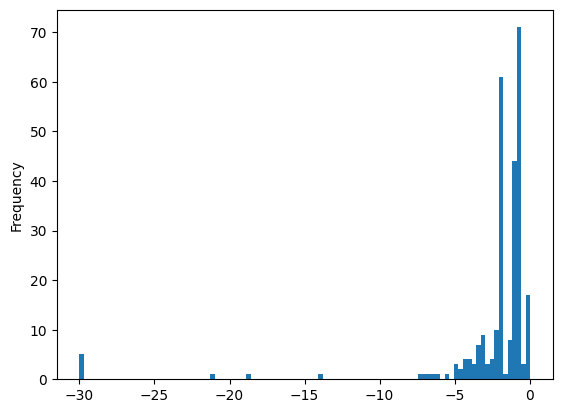

In [253]:
df_issue[~np.isnan(check1) & (check1!=0)]['check1'].clip(
    upper=+10, lower=-30,
).plot.hist(bins=100)

In [201]:
nulls = np.isnan(df_laps_timing).sum(axis=0)
nulls

array([   0, 2652, 1565,  216,  752, 1565,  216,  752,    0,    0,    0,
          0])

In [202]:
df_laps[cols].isna().sum()

Time                     0
LapTime               2652
Sector1Time           1565
Sector2Time            216
Sector3Time            752
Sector1SessionTime    1565
Sector2SessionTime     216
Sector3SessionTime     752
LapStartTime             0
session_start_time       0
LapStartDate             0
t0_date                  0
dtype: int64

In [203]:
never_null = ['Time', 'LapStartTime', 'session_start_time', 'LapStartDate', 't0_date']

In [204]:
for combindex, val in sorted([(i, x) for i, x in enumerate(stdall)], key=lambda x: x[1])[:]:
    expl = explain_combination(zero_combinations[combindex])
    if all([x[1] in never_null for x in expl]):
        print(val)
        print(expl)

7.668614773615066e-10
[(1, 'LapStartTime'), (-1, 'LapStartDate'), (1, 't0_date')]


In [205]:
arr = df_laps_timing[df_laps['IsAccurate']][:, [0, 8, 9, 10, 11]]
pca_accurate2 = PCA().fit(arr)
pca_accurate2.explained_variance_

array([1.61636662e+13, 1.54869158e+07, 6.54606403e+05, 1.15681757e+02,
       1.34566643e-17])

In [206]:
pca_accurate2.components_[-1].round(10)

array([-1.00000000e-10,  5.77350269e-01,  0.00000000e+00, -5.77350269e-01,
        5.77350269e-01])

In [207]:
check1 = arr[:, 4] + arr[:, 1] - arr[:, 3]
check1.std()

8.006239578988379e-10

In [208]:
df_laps_timing = np.array([
    df_laps[col].apply(lambda x: float(x.total_seconds()))
    if col not in ['LapStartDate', 't0_date']
    else df_laps[col].apply(lambda x: float((x - reference).total_seconds()))
    for col in cols
]).T

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime',
 'session_start_time',
 'LapStartDate',
 't0_date']

In [257]:
for combindex, val in sorted([
    (i, x) for i, x in enumerate(stdall)],
    key=lambda x: (x[1])
)[:]:
    expl = explain_combination(zero_combinations[combindex])
    if all(c not in [y[1] for y in expl] for c in [
        't0_date', 'Sector1Time', 'Sector2Time', 'Sector3Time'
    ]):
        print(val)
        print(expl)

306.1260700139125
[(-1, 'Time'), (1, 'LapTime'), (1, 'LapStartTime')]
1474.1486116509182
[(1, 'LapTime'), (-1, 'Sector3SessionTime'), (1, 'LapStartTime')]
1583.9270428850266
[(-1, 'Time'), (1, 'Sector3SessionTime')]


In [260]:
for combindex, val in sorted([
    (i, x) for i, x in enumerate(stdall)],
    key=lambda x: (x[1])
)[:]:
    expl = explain_combination(zero_combinations[combindex])
    if all(c not in [y[1] for y in expl] for c in [
        't0_date', 'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime'
    ]):
        print(val)
        print(expl)
    if all(c not in [y[1] for y in expl] for c in [
        't0_date', 'Sector1Time', 'Sector2Time', 'Sector3Time'
    ]):
        print(val)
        print(expl)

51.06070683822062
[(-1, 'LapTime'), (1, 'Sector1Time'), (1, 'Sector2Time'), (1, 'Sector3Time')]
292.0081263711047
[(-1, 'Time'), (1, 'Sector1Time'), (1, 'Sector2Time'), (1, 'Sector3Time'), (1, 'LapStartTime')]
306.1260700139125
[(-1, 'Time'), (1, 'LapTime'), (1, 'LapStartTime')]
306.1260700139125
[(-1, 'Time'), (1, 'LapTime'), (1, 'LapStartTime')]
1474.1486116509182
[(1, 'LapTime'), (-1, 'Sector3SessionTime'), (1, 'LapStartTime')]
1583.9270428850266
[(-1, 'Time'), (1, 'Sector3SessionTime')]


* `LapStartDate` = `t0_date` + `LapStartTime`

* `LapTime` = `Sector1Time` + `Sector2Time` + `Sector3Time`

* `Time` = `Sector1Time` + `Sector2Time` + `Sector3Time` + `LapStartTime`

* `Time` = `LapTime` + `LapStartTime`

* `Sector3SessionTime` = `LapTime` + `LapStartTime`

* `Time` = `Sector3SessionTime`




## Lap Start and Lap End

In [305]:
lap_pkey = ['year', 'round_number', 'session_type', 'DriverNumber', 'LapNumber']
lap_start_end = (
    df_laps
    .assign(timestamp_start=lambda df: df['LapStartDate'])
    .assign(timestamp_endA=lambda df: df.apply(lambda row:
        row['t0_date'] + timedelta(seconds=row['Time'].total_seconds()),
        axis=1,
    ))
    .assign(timestamp_endB=lambda df: df.apply(lambda row:
        (
            row['t0_date'] + timedelta(seconds=row['LapStartTime'].total_seconds() + row['LapTime'].total_seconds())
            if pd.notna(row['LapTime'])
            else None
        ),
        axis=1,
    ))
    [lap_pkey + ['timestamp_start', 'timestamp_endA', 'timestamp_endB']]
    .sort_values(by=lap_pkey)
    .reset_index(drop=True)
)

In [306]:
len(lap_start_end), lap_start_end.isna().sum()

(19135,
 year                  0
 round_number          0
 session_type          0
 DriverNumber          0
 LapNumber             0
 timestamp_start       0
 timestamp_endA        0
 timestamp_endB     2652
 dtype: int64)

In [309]:
for col in ['timestamp_start']:
    lap_start_end['next_'+col] = (
        lap_start_end
        .sort_values(by=lap_pkey)
        .groupby(lap_pkey[:-1])
        [col].shift(-1)
    )
for col in ['timestamp_endA', 'timestamp_endB']:
    lap_start_end['previous_'+col] = (
        lap_start_end
        .sort_values(by=lap_pkey)
        .groupby(lap_pkey[:-1])
        [col].shift(+1)
    )

In [310]:
lap_start_end

,year,round_number,session_type,DriverNumber,LapNumber,timestamp_start,timestamp_endA,timestamp_endB,next_timestamp_start,previous_timestamp_endA,previous_timestamp_endB
0,2023,1,1,1,1.0,2023-03-03 11:33:59.758,2023-03-03 11:36:17.450,NaT,2023-03-03 11:36:17.450,NaT,NaT
1,2023,1,1,1,2.0,2023-03-03 11:36:17.450,2023-03-03 11:37:52.879,2023-03-03 11:37:52.879,2023-03-03 11:37:52.879,2023-03-03 11:36:17.450,NaT
2,2023,1,1,1,3.0,2023-03-03 11:37:52.879,2023-03-03 11:40:36.564,NaT,2023-03-03 11:40:36.564,2023-03-03 11:37:52.879,2023-03-03 11:37:52.879
3,2023,1,1,1,4.0,2023-03-03 11:40:36.564,2023-03-03 11:43:22.584,NaT,2023-03-03 11:43:22.584,2023-03-03 11:40:36.564,NaT
4,2023,1,1,1,5.0,2023-03-03 11:43:22.584,2023-03-03 11:45:16.246,2023-03-03 11:45:16.246,2023-03-03 11:45:16.246,2023-03-03 11:43:22.584,NaT
...,...,...,...,...,...,...,...,...,...,...,...
19130,2023,7,5,81,61.0,2023-06-04 14:24:40.650,2023-06-04 14:25:59.728,2023-06-04 14:25:59.728,2023-06-04 14:25:59.728,2023-06-04 14:24:40.650,2023-06-04 14:24:40.650
19131,2023,7,5,81,62.0,2023-06-04 14:25:59.728,2023-06-04 14:27:18.928,2023-06-04 14:27:18.928,2023-06-04 14:27:18.928,2023-06-04 14:25:59.728,2023-06-04 14:25:59.728
19132,2023,7,5,81,63.0,2023-06-04 14:27:18.928,2023-06-04 14:28:39.925,2023-06-04 14:28:39.925,2023-06-04 14:28:39.925,2023-06-04 14:27:18.928,2023-06-04 14:27:18.928
19133,2023,7,5,81,64.0,2023-06-04 14:28:39.925,2023-06-04 14:29:59.318,2023-06-04 14:29:59.318,2023-06-04 14:29:59.318,2023-06-04 14:28:39.925,2023-06-04 14:28:39.925


In [312]:
lap_start_end.isna().sum()

year                          0
round_number                  0
session_type                  0
DriverNumber                  0
LapNumber                     0
timestamp_start               0
timestamp_endA                0
timestamp_endB             2652
next_timestamp_start        677
previous_timestamp_endA     677
previous_timestamp_endB    3036
dtype: int64

In [318]:
check = (
    lap_start_end['next_timestamp_start']
    - lap_start_end['timestamp_endA']
).apply(lambda x: x.total_seconds())
check.value_counts(dropna=False)

 0.000       18294
 NaN           677
 2.042           2
 0.698           2
 1.980           2
             ...  
-18.718          1
-50.749          1
-26.921          1
-17.015          1
 2081.726        1
Length: 163, dtype: int64

In [319]:
check = (
    lap_start_end['next_timestamp_start']
    - lap_start_end['timestamp_endB']
).apply(lambda x: x.total_seconds())
check.value_counts(dropna=False)

 0.000    15820
 NaN       3036
-0.676        3
-1.997        3
-0.872        2
          ...  
-4.009        1
-3.537        1
-4.434        1
-1.977        1
 0.028        1
Length: 257, dtype: int64

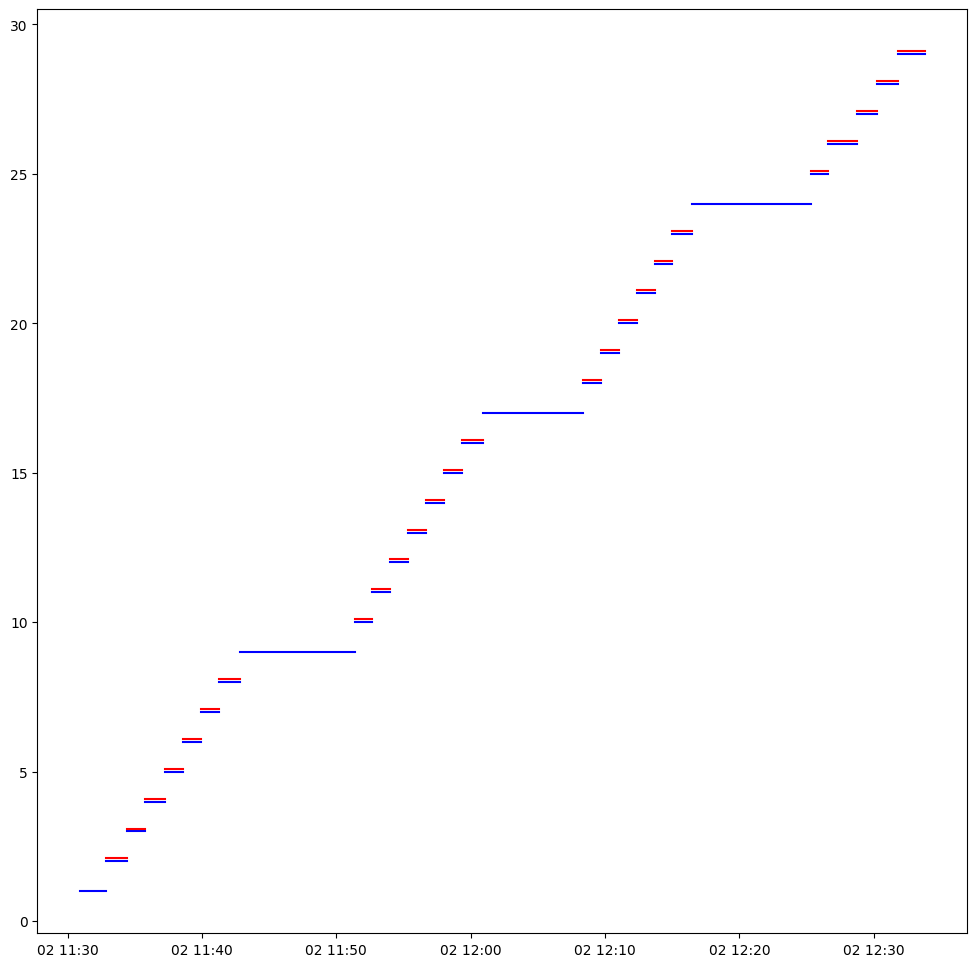

In [329]:
import matplotlib.pyplot as plt
plot_df = (
    lap_start_end
    .query('year==2023')
    .query('round_number==7')
    .query('session_type==1')
    .query('DriverNumber=="44"')
)
fig, ax = plt.subplots(figsize=(12, 12))
for _, row in plot_df.iterrows():
    ax.plot(
        [row['timestamp_start'], row['timestamp_endA']],
        [row['LapNumber']] * 2,
        'b-'
    )
    ax.plot(
        [row['timestamp_start'], row['timestamp_endB'] if pd.notna(row['timestamp_endB']) else row['timestamp_start']],
        [row['LapNumber']+0.1] * 2,
        'r-'
    )


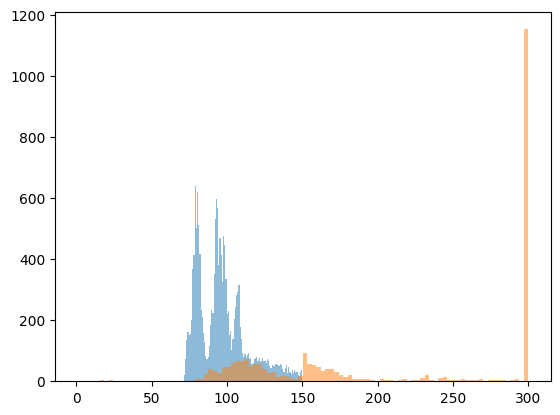

In [339]:
series = (
    (
        lap_start_end['timestamp_endA'] 
        - lap_start_end['timestamp_start']
    ).apply(lambda x: x.total_seconds())
)
fig, ax = plt.subplots()
ax.hist(series[lap_start_end['timestamp_endB'].notna()].clip(upper=300), bins=100, alpha=0.5);
ax.hist(series[lap_start_end['timestamp_endB'].isna()].clip(upper=300), bins=100, alpha=0.5);

## Status for pits

In [349]:
df_laps['pit_status'] = 'no_pit'
df_laps.loc[df_laps['PitInTime'].notna(), 'pit_status'] = 'in'
df_laps.loc[df_laps['PitOutTime'].notna(), 'pit_status'] = 'out'
df_laps.loc[df_laps['PitInTime'].notna() & df_laps['PitOutTime'].notna(), 'pit_status'] = 'in_out'
df_laps['pit_status'].value_counts(dropna=False)

no_pit    14442
out        2337
in         2166
in_out      190
Name: pit_status, dtype: int64

In [366]:
def split_laps_by_stint(df_in):
    counter = 1
    df_out = df_in.copy()
    df_out['stint_number'] = None
    for i in range(len(df_in)):
        df_out['stint_number'].iloc[i] = counter
        if pd.notna(df_out.iloc[i]['PitInTime']):
            print(i, counter)
            counter += 1
    for stint in sorted(df_out['stint_number'].unique()):
        yield df_out[df_out['stint_number']==stint]


In [375]:
example = list(split_laps_by_stint(
    df_laps
    .query('year==2023')
    .query('round_number==2')
    .query('session_type==2')
    .query('DriverNumber=="63"')
))

5 1
12 2
13 3
26 4


/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/2788539521.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['stint_number'].iloc[i] = counter


In [376]:
[x.shape for x in example]

[(6, 35), (7, 35), (1, 35), (13, 35)]

In [387]:
cols_show = [
    'Time', 'LapNumber', 'PitOutTime', 'PitInTime', 
    'stint_number', 'Stint', 'LapTime', 'LapStartTime', 'LapStartDate',
]

In [388]:
example[0][cols_show]

,Time,LapNumber,PitOutTime,PitInTime,stint_number,Stint,LapTime,LapStartTime,LapStartDate
29,0 days 00:18:46.305000,1.0,0 days 00:16:52.364000,NaT,1,1,NaT,0 days 00:16:52.364000,2023-03-17 17:01:52.379
30,0 days 00:20:59.705000,2.0,NaT,NaT,1,1,0 days 00:02:13.400000,0 days 00:18:46.305000,2023-03-17 17:03:46.320
31,0 days 00:22:32.273000,3.0,NaT,NaT,1,1,0 days 00:01:32.568000,0 days 00:20:59.705000,2023-03-17 17:05:59.720
32,0 days 00:24:47.953000,4.0,NaT,NaT,1,1,0 days 00:02:15.680000,0 days 00:22:32.273000,2023-03-17 17:07:32.288
33,0 days 00:26:19.330000,5.0,NaT,NaT,1,1,0 days 00:01:31.377000,0 days 00:24:47.953000,2023-03-17 17:09:47.968
34,0 days 00:28:18.648000,6.0,NaT,0 days 00:28:17.575000,1,1,0 days 00:01:59.318000,0 days 00:26:19.330000,2023-03-17 17:11:19.345


In [389]:
example[1][cols_show]

,Time,LapNumber,PitOutTime,PitInTime,stint_number,Stint,LapTime,LapStartTime,LapStartDate
35,0 days 00:37:52.412000,7.0,0 days 00:36:03.101000,NaT,2,2,NaT,0 days 00:28:18.648000,2023-03-17 17:13:18.663
36,0 days 00:39:23.168000,8.0,NaT,NaT,2,2,0 days 00:01:30.756000,0 days 00:37:52.412000,2023-03-17 17:22:52.427
37,0 days 00:42:06.400000,9.0,NaT,NaT,2,2,NaT,0 days 00:39:23.168000,2023-03-17 17:24:23.183
38,0 days 00:44:15.288000,10.0,NaT,NaT,2,2,0 days 00:02:08.888000,0 days 00:42:06.400000,2023-03-17 17:27:06.415
39,0 days 00:46:13.132000,11.0,NaT,NaT,2,2,0 days 00:01:57.844000,0 days 00:44:15.288000,2023-03-17 17:29:15.303
40,0 days 00:47:43.202000,12.0,NaT,NaT,2,2,0 days 00:01:30.070000,0 days 00:46:13.132000,2023-03-17 17:31:13.147
41,0 days 00:49:35.985000,13.0,NaT,0 days 00:49:34.826000,2,2,0 days 00:01:52.783000,0 days 00:47:43.202000,2023-03-17 17:32:43.217


In [390]:
example[2][cols_show]

,Time,LapNumber,PitOutTime,PitInTime,stint_number,Stint,LapTime,LapStartTime,LapStartDate
42,0 days 00:57:58.230000,14.0,0 days 00:56:02.556000,0 days 00:57:57.070000,3,3,NaT,0 days 00:49:35.985000,2023-03-17 17:34:36


In [391]:
example[3][cols_show]

,Time,LapNumber,PitOutTime,PitInTime,stint_number,Stint,LapTime,LapStartTime,LapStartDate
43,0 days 01:00:09.733000,15.0,0 days 00:58:20.788000,NaT,4,4,0 days 00:02:11.503000,0 days 00:57:58.230000,2023-03-17 17:42:58.245
44,0 days 01:01:45.025000,16.0,NaT,NaT,4,4,0 days 00:01:35.292000,0 days 01:00:09.733000,2023-03-17 17:45:09.748
45,0 days 01:03:20.514000,17.0,NaT,NaT,4,4,0 days 00:01:35.489000,0 days 01:01:45.025000,2023-03-17 17:46:45.040
46,0 days 01:04:56.056000,18.0,NaT,NaT,4,4,0 days 00:01:35.542000,0 days 01:03:20.514000,2023-03-17 17:48:20.529
47,0 days 01:06:31.308000,19.0,NaT,NaT,4,4,0 days 00:01:35.252000,0 days 01:04:56.056000,2023-03-17 17:49:56.071
48,0 days 01:08:06.579000,20.0,NaT,NaT,4,4,0 days 00:01:35.271000,0 days 01:06:31.308000,2023-03-17 17:51:31.323
49,0 days 01:09:41.930000,21.0,NaT,NaT,4,4,0 days 00:01:35.351000,0 days 01:08:06.579000,2023-03-17 17:53:06.594
50,0 days 01:11:20.697000,22.0,NaT,NaT,4,4,0 days 00:01:38.767000,0 days 01:09:41.930000,2023-03-17 17:54:41.945
51,0 days 01:12:56.167000,23.0,NaT,NaT,4,4,0 days 00:01:35.470000,0 days 01:11:20.697000,2023-03-17 17:56:20.712
52,0 days 01:14:31.889000,24.0,NaT,NaT,4,4,0 days 00:01:35.722000,0 days 01:12:56.167000,2023-03-17 17:57:56.182


## Let's now put together a log of a session

In [468]:
def log_timing_session_driver(df_session_driver):
    # Split by stint
    counter_stint = 1
    counter_lap = 1
    df_out = df_session_driver.copy()
    df_out['stint_number'] = None
    df_out['lap_number_in_stint'] = None
    for i in range(len(df_out)):
        df_out['stint_number'].iloc[i] = counter_stint
        df_out['lap_number_in_stint'].iloc[i] = counter_lap
        if pd.notna(df_out.iloc[i]['PitInTime']):
            counter_stint += 1
            counter_lap = 0
        counter_lap += 1

    flter = df_out['PitOutTime'].notna() & (df_out['PitOutTime'] > df_out['LapStartTime'])
    df_out.loc[flter, 'start_timestamp'] = df_out.loc[flter, 'PitOutTime']
    df_out.loc[flter, 'start_location'] = 'pit_exit'
    df_out.loc[~flter, 'start_timestamp'] = df_out.loc[~flter, 'LapStartTime']
    df_out.loc[~flter, 'start_location'] = 'track'

    flter = df_out['PitInTime'].notna() & (df_out['PitInTime'] < df_out['Time'])
    df_out.loc[flter, 'end_timestamp'] = df_out.loc[flter, ['PitInTime', 'Time']].min(axis=1)
    df_out.loc[flter, 'end_location'] = 'pit_entry'
    df_out.loc[~flter, 'end_timestamp'] = df_out.loc[~flter, 'Time']
    df_out.loc[~flter, 'end_location'] = 'track'

    df_out['lap_duration'] = (
        df_out['end_timestamp'] - df_out['start_timestamp']
    )

    df_out['time_in_pit_before'] = (
        (df_out['start_timestamp'] - df_out['end_timestamp'].shift(1))
    )
    df_out['time_in_pit_after'] = (
        (df_out['start_timestamp'].shift(-1) - df_out['end_timestamp'])
    )


    cols_out = [
        'year', 'round_number', 'session_type', 'DriverNumber', 'LapNumber',
        'stint_number', 'lap_number_in_stint',
        'start_timestamp', 'start_location',
        'end_timestamp', 'end_location',
        'lap_duration',
        'time_in_pit_before', 'time_in_pit_after'
    ]

    return df_out[cols_out]


In [469]:
example = log_timing_session_driver(
    df_laps
    .query('year==2023')
    .query('round_number==2')
    .query('session_type==2')
    .query('DriverNumber=="63"')
)

/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/2759291780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['stint_number'].iloc[i] = counter_stint
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/2759291780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['lap_number_in_stint'].iloc[i] = counter_lap


In [470]:
example

,year,round_number,session_type,DriverNumber,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,lap_duration,time_in_pit_before,time_in_pit_after
29,2023,2,2,63,1.0,1,1,0 days 00:16:52.364000,track,0 days 00:18:46.305000,track,0 days 00:01:53.941000,NaT,0 days 00:00:00
30,2023,2,2,63,2.0,1,2,0 days 00:18:46.305000,track,0 days 00:20:59.705000,track,0 days 00:02:13.400000,0 days 00:00:00,0 days 00:00:00
31,2023,2,2,63,3.0,1,3,0 days 00:20:59.705000,track,0 days 00:22:32.273000,track,0 days 00:01:32.568000,0 days 00:00:00,0 days 00:00:00
32,2023,2,2,63,4.0,1,4,0 days 00:22:32.273000,track,0 days 00:24:47.953000,track,0 days 00:02:15.680000,0 days 00:00:00,0 days 00:00:00
33,2023,2,2,63,5.0,1,5,0 days 00:24:47.953000,track,0 days 00:26:19.330000,track,0 days 00:01:31.377000,0 days 00:00:00,0 days 00:00:00
34,2023,2,2,63,6.0,1,6,0 days 00:26:19.330000,track,0 days 00:28:17.575000,pit_entry,0 days 00:01:58.245000,0 days 00:00:00,0 days 00:07:45.526000
35,2023,2,2,63,7.0,2,1,0 days 00:36:03.101000,pit_exit,0 days 00:37:52.412000,track,0 days 00:01:49.311000,0 days 00:07:45.526000,0 days 00:00:00
36,2023,2,2,63,8.0,2,2,0 days 00:37:52.412000,track,0 days 00:39:23.168000,track,0 days 00:01:30.756000,0 days 00:00:00,0 days 00:00:00
37,2023,2,2,63,9.0,2,3,0 days 00:39:23.168000,track,0 days 00:42:06.400000,track,0 days 00:02:43.232000,0 days 00:00:00,0 days 00:00:00
38,2023,2,2,63,10.0,2,4,0 days 00:42:06.400000,track,0 days 00:44:15.288000,track,0 days 00:02:08.888000,0 days 00:00:00,0 days 00:00:00


In [471]:
example = log_timing_session_driver(
    df_laps
    .query('year==2023')
    .query('round_number==7')
    .query('session_type==5')
    .query('DriverNumber=="4"')
)
example.iloc[:30]

/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/2759291780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['stint_number'].iloc[i] = counter_stint
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/2759291780.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['lap_number_in_stint'].iloc[i] = counter_lap


,year,round_number,session_type,DriverNumber,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,lap_duration,time_in_pit_before,time_in_pit_after
1052,2023,7,5,4,1.0,1,1,0 days 01:02:15.963000,track,0 days 01:03:44.836000,pit_entry,0 days 00:01:28.873000,NaT,0 days 00:00:37.734000
1053,2023,7,5,4,2.0,2,1,0 days 01:04:22.570000,pit_exit,0 days 01:05:43.621000,track,0 days 00:01:21.051000,0 days 00:00:37.734000,0 days 00:00:00
1054,2023,7,5,4,3.0,2,2,0 days 01:05:43.621000,track,0 days 01:07:03.693000,track,0 days 00:01:20.072000,0 days 00:00:00,0 days 00:00:00
1055,2023,7,5,4,4.0,2,3,0 days 01:07:03.693000,track,0 days 01:08:23.744000,track,0 days 00:01:20.051000,0 days 00:00:00,0 days 00:00:00
1056,2023,7,5,4,5.0,2,4,0 days 01:08:23.744000,track,0 days 01:09:43.985000,track,0 days 00:01:20.241000,0 days 00:00:00,0 days 00:00:00
1057,2023,7,5,4,6.0,2,5,0 days 01:09:43.985000,track,0 days 01:11:05.007000,track,0 days 00:01:21.022000,0 days 00:00:00,0 days 00:00:00
1058,2023,7,5,4,7.0,2,6,0 days 01:11:05.007000,track,0 days 01:12:25.825000,track,0 days 00:01:20.818000,0 days 00:00:00,0 days 00:00:00
1059,2023,7,5,4,8.0,2,7,0 days 01:12:25.825000,track,0 days 01:13:46.632000,track,0 days 00:01:20.807000,0 days 00:00:00,0 days 00:00:00
1060,2023,7,5,4,9.0,2,8,0 days 01:13:46.632000,track,0 days 01:15:07.802000,track,0 days 00:01:21.170000,0 days 00:00:00,0 days 00:00:00
1061,2023,7,5,4,10.0,2,9,0 days 01:15:07.802000,track,0 days 01:16:29.938000,track,0 days 00:01:22.136000,0 days 00:00:00,0 days 00:00:00


In [472]:
df = (
    df_laps
    .query('year==2023')
    .query('round_number==7')
    .query('session_type==5')
    .query('DriverNumber=="4"')
)

In [473]:
df.head().T

,1052,1053,1054,1055,1056
Time,0 days 01:03:47.621000,0 days 01:05:43.621000,0 days 01:07:03.693000,0 days 01:08:23.744000,0 days 01:09:43.985000
DriverNumber,4,4,4,4,4
LapTime,NaT,0 days 00:01:56,0 days 00:01:20.072000,0 days 00:01:20.051000,0 days 00:01:20.241000
LapNumber,1.0,2.0,3.0,4.0,5.0
PitOutTime,0 days 00:15:03.373000,0 days 01:04:22.570000,NaT,NaT,NaT
PitInTime,0 days 01:03:44.836000,NaT,NaT,NaT,NaT
Sector1Time,NaT,0 days 00:00:59.453000,0 days 00:00:24.096000,0 days 00:00:24.014000,0 days 00:00:24.045000
Sector2Time,0 days 00:00:34.052000,0 days 00:00:32.300000,0 days 00:00:31.990000,0 days 00:00:32.093000,0 days 00:00:32.122000
Sector3Time,0 days 00:00:28.208000,0 days 00:00:24.247000,0 days 00:00:23.986000,0 days 00:00:23.944000,0 days 00:00:24.074000
Sector1SessionTime,NaT,0 days 01:04:47.074000,0 days 01:06:07.717000,0 days 01:07:27.707000,0 days 01:08:47.789000


In [568]:
def split_times(df_session_driver):
    # Split by stint
    counter_stint = 1
    counter_lap = 1
    df_out = df_session_driver.copy()
    df_out['stint_number'] = None
    df_out['lap_number_in_stint'] = None
    for i in range(len(df_out)):
        df_out['stint_number'].iloc[i] = counter_stint
        df_out['lap_number_in_stint'].iloc[i] = counter_lap
        if pd.notna(df_out.iloc[i]['PitInTime']):
            counter_stint += 1
            counter_lap = 0
        counter_lap += 1

    flter = df_out['PitOutTime'].notna() & (df_out['PitOutTime'] > df_out['LapStartTime'])
    df_out.loc[flter, 'start_timestamp'] = df_out.loc[flter, 'PitOutTime']
    df_out.loc[flter, 'start_location'] = 'pit_exit'
    df_out.loc[~flter, 'start_timestamp'] = df_out.loc[~flter, 'LapStartTime']
    df_out.loc[~flter, 'start_location'] = 'track'

    flter = df_out['PitInTime'].notna() & (df_out['PitInTime'] < df_out['Time'])
    df_out.loc[flter, 'end_timestamp'] = df_out.loc[flter, ['PitInTime', 'Time']].min(axis=1)
    df_out.loc[flter, 'end_location'] = 'pit_entry'
    df_out.loc[~flter, 'end_timestamp'] = df_out.loc[~flter, 'Time']
    df_out.loc[~flter, 'end_location'] = 'track'

    cols_output = [
        'year', 'round_number', 'session_type', 'DriverNumber',
        'LapNumber', 'stint_number', 'lap_number_in_stint',
        'start_timestamp', 'start_location',
        'end_timestamp', 'end_location',
        't0_date', 'session_start_time',
    ]
    dfls_stints = [
        df_out[df_out['stint_number']==st][cols_output].assign(event_type='lap')
        for st in sorted(df_out['stint_number'].unique())
    ]
    dfls_pits = [
        stA.iloc[-1:].assign(
            event_type='pit',
            LapNumber=np.nan,
            stint_number=np.nan,
            lap_number_in_stint=np.nan,
            start_timestamp=stA['end_timestamp'].max(),
            start_location='pit_entry',
            end_timestamp=stB['start_timestamp'].min(),
            end_location='pit_exit',

        )
        for stA, stB in zip(dfls_stints, dfls_stints[1:])
    ]
    df_out = (
        pd.concat(dfls_stints + dfls_pits)
        .sort_values(by=['start_timestamp'])
        .reset_index(drop=True)
    )
    df_out['elapsed_time'] = (
        df_out['end_timestamp'] - df_out['start_timestamp']
    )
    df_out.index.name = 'event_index'

    return df_out

In [569]:
example = split_times(
    df_laps
    .query('year==2023')
    .query('round_number==7')
    .query('session_type==5')
    .query('DriverNumber=="4"')
)
example = split_times(
    df_laps
    .query('year==2023')
    .query('round_number==7')
    .query('session_type==3')
    .query('DriverNumber=="4"')
)

/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3258474506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['stint_number'].iloc[i] = counter_stint
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3258474506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['lap_number_in_stint'].iloc[i] = counter_lap
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3258474506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [570]:
example

,year,round_number,session_type,DriverNumber,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,t0_date,session_start_time,event_type,elapsed_time
event_index,,,,,,,,,,,,,,,
0,2023,7,3,4,1.0,1,1,0 days 00:15:18.828000,track,0 days 00:17:06.020000,track,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:01:47.192000
1,2023,7,3,4,2.0,1,2,0 days 00:17:06.020000,track,0 days 00:18:20.701000,track,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:01:14.681000
2,2023,7,3,4,3.0,1,3,0 days 00:18:20.701000,track,0 days 00:20:28.580000,track,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:02:07.879000
3,2023,7,3,4,4.0,1,4,0 days 00:20:28.580000,track,0 days 00:21:43.270000,track,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:01:14.690000
4,2023,7,3,4,5.0,1,5,0 days 00:21:43.270000,track,0 days 00:23:52.943000,pit_entry,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:02:09.673000
5,2023,7,3,4,NaN,NaN,NaN,0 days 00:23:52.943000,pit_entry,0 days 00:45:50.795000,pit_exit,2023-06-03 10:15:11.905,0 days 00:14:48.234000,pit,0 days 00:21:57.852000
6,2023,7,3,4,6.0,2,1,0 days 00:45:50.795000,track,0 days 00:47:33.059000,pit_entry,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:01:42.264000
7,2023,7,3,4,NaN,NaN,NaN,0 days 00:47:33.059000,pit_entry,0 days 00:57:06.236000,pit_exit,2023-06-03 10:15:11.905,0 days 00:14:48.234000,pit,0 days 00:09:33.177000
8,2023,7,3,4,7.0,3,1,0 days 00:57:06.236000,pit_exit,0 days 00:58:56.476000,track,2023-06-03 10:15:11.905,0 days 00:14:48.234000,lap,0 days 00:01:50.240000


In [523]:
example['type'].value_counts()

lap    20
pit     3
Name: type, dtype: int64

In [526]:
example.query('type=="pit"')

,year,round_number,session_type,DriverNumber,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,type,elapsed_time
5,2023,7,3,4,NaN,NaN,NaN,0 days 00:23:52.943000,pit_entry,0 days 00:45:50.795000,pit_exit,pit,0 days 00:21:57.852000
7,2023,7,3,4,NaN,NaN,NaN,0 days 00:47:33.059000,pit_entry,0 days 00:57:06.236000,pit_exit,pit,0 days 00:09:33.177000
13,2023,7,3,4,NaN,NaN,NaN,0 days 01:05:28.805000,pit_entry,0 days 01:06:02.351000,pit_exit,pit,0 days 00:00:33.546000


In [527]:
example

,year,round_number,session_type,DriverNumber,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,type,elapsed_time
0,2023,7,3,4,1.0,1,1,0 days 00:15:18.828000,track,0 days 00:17:06.020000,track,lap,0 days 00:01:47.192000
1,2023,7,3,4,2.0,1,2,0 days 00:17:06.020000,track,0 days 00:18:20.701000,track,lap,0 days 00:01:14.681000
2,2023,7,3,4,3.0,1,3,0 days 00:18:20.701000,track,0 days 00:20:28.580000,track,lap,0 days 00:02:07.879000
3,2023,7,3,4,4.0,1,4,0 days 00:20:28.580000,track,0 days 00:21:43.270000,track,lap,0 days 00:01:14.690000
4,2023,7,3,4,5.0,1,5,0 days 00:21:43.270000,track,0 days 00:23:52.943000,pit_entry,lap,0 days 00:02:09.673000
5,2023,7,3,4,NaN,NaN,NaN,0 days 00:23:52.943000,pit_entry,0 days 00:45:50.795000,pit_exit,pit,0 days 00:21:57.852000
6,2023,7,3,4,6.0,2,1,0 days 00:45:50.795000,track,0 days 00:47:33.059000,pit_entry,lap,0 days 00:01:42.264000
7,2023,7,3,4,NaN,NaN,NaN,0 days 00:47:33.059000,pit_entry,0 days 00:57:06.236000,pit_exit,pit,0 days 00:09:33.177000
8,2023,7,3,4,7.0,3,1,0 days 00:57:06.236000,pit_exit,0 days 00:58:56.476000,track,lap,0 days 00:01:50.240000
9,2023,7,3,4,8.0,3,2,0 days 00:58:56.476000,track,0 days 01:00:21.736000,track,lap,0 days 00:01:25.260000


In [524]:
example.groupby(['type'])['elapsed_time'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
lap,20,0 days 00:01:35.315450,0 days 00:00:19.320224822,0 days 00:01:14.681000,0 days 00:01:19.801500,0 days 00:01:27.062000,0 days 00:01:47.954000,0 days 00:02:10.084000
pit,3,0 days 00:10:41.525000,0 days 00:10:44.875229976,0 days 00:00:33.546000,0 days 00:05:03.361500,0 days 00:09:33.177000,0 days 00:15:45.514500,0 days 00:21:57.852000


In [506]:
chA = (
    (df['start_timestamp'] - df['end_timestamp'].shift(1))
)
chB = (
    (df['start_timestamp'].shift(-1) - df['end_timestamp'])
)


In [508]:
chA.value_counts(dropna=False)

0 days    67
NaT        1
dtype: int64

In [509]:
chB.value_counts(dropna=False)

0 days    67
NaT        1
dtype: int64

In [528]:
df_schedule = ReadTrusted_Schedule().read()

In [529]:
df_schedule

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,...,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport,is_testing,year,created_at
0,1,Australia,Melbourne,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,2018-03-25 18:10:00,Australian Grand Prix,conventional,Practice 1,2018-03-23 12:00:00,Practice 2,...,Practice 3,2018-03-24 14:00:00,Qualifying,2018-03-24 17:00:00,Race,2018-03-25 16:10:00,True,False,2018,2023-06-01 03:20:50.763322
1,2,Bahrain,Sakhir,FORMULA 1 2018 GULF AIR BAHRAIN GRAND PRIX,2018-04-08 20:10:00,Bahrain Grand Prix,conventional,Practice 1,2018-04-06 14:00:00,Practice 2,...,Practice 3,2018-04-07 15:00:00,Qualifying,2018-04-07 18:00:00,Race,2018-04-08 18:10:00,True,False,2018,2023-06-01 03:20:50.763322
2,3,China,Shanghai,FORMULA 1 2018 HEINEKEN CHINESE GRAND PRIX,2018-04-15 16:10:00,Chinese Grand Prix,conventional,Practice 1,2018-04-13 10:00:00,Practice 2,...,Practice 3,2018-04-14 11:00:00,Qualifying,2018-04-14 14:00:00,Race,2018-04-15 14:10:00,True,False,2018,2023-06-01 03:20:50.763322
3,4,Azerbaijan,Baku,FORMULA 1 2018 AZERBAIJAN GRAND PRIX,2018-04-29 18:10:00,Azerbaijan Grand Prix,conventional,Practice 1,2018-04-27 13:00:00,Practice 2,...,Practice 3,2018-04-28 14:00:00,Qualifying,2018-04-28 17:00:00,Race,2018-04-29 16:10:00,True,False,2018,2023-06-01 03:20:50.763322
4,5,Spain,Barcelona,FORMULA 1 GRAN PREMIO DE ESPAÑA EMIRATES 2018,2018-05-13 17:10:00,Spanish Grand Prix,conventional,Practice 1,2018-05-11 11:00:00,Practice 2,...,Practice 3,2018-05-12 12:00:00,Qualifying,2018-05-12 15:00:00,Race,2018-05-13 15:10:00,True,False,2018,2023-06-01 03:20:50.763322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,18,United States,Austin,FORMULA 1 LENOVO UNITED STATES GRAND PRIX 2023,2023-10-22 16:00:00,United States Grand Prix,sprint_shootout,Practice 1,2023-10-20 12:30:00,Qualifying,...,Sprint Shootout,2023-10-21 12:30:00,Sprint,2023-10-21 17:00:00,Race,2023-10-22 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
19,19,Mexico,Mexico City,FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2023,2023-10-29 16:00:00,Mexico City Grand Prix,conventional,Practice 1,2023-10-27 12:30:00,Practice 2,...,Practice 3,2023-10-28 11:30:00,Qualifying,2023-10-28 15:00:00,Race,2023-10-29 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
20,20,Brazil,São Paulo,FORMULA 1 ROLEX GRANDE PRÊMIO DE SÃO PAULO 2023,2023-11-05 16:00:00,São Paulo Grand Prix,sprint_shootout,Practice 1,2023-11-03 11:30:00,Qualifying,...,Sprint Shootout,2023-11-04 11:00:00,Sprint,2023-11-04 15:30:00,Race,2023-11-05 14:00:00,True,False,2023,2023-06-01 02:53:04.322135
21,21,United States,Las Vegas,FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX...,2023-11-18 23:59:59,Las Vegas Grand Prix,conventional,Practice 1,2023-11-16 20:30:00,Practice 2,...,Practice 3,2023-11-17 20:30:00,Qualifying,2023-11-18 00:00:00,Race,2023-11-18 22:00:00,True,False,2023,2023-06-01 02:53:04.322135


## Transforming

In [545]:
pkey = ['year', 'round_number', 'session_type', 'DriverNumber']
example_all = (
    df_laps
    .query('year==2023')
    .query('round_number==7')
    .groupby(['year', 'round_number', 'session_type', 'DriverNumber'])
    .apply(lambda df: (
        split_times(df)
        .drop(pkey, axis=1)
    ))
    .reset_index()
)

/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/4147513748.py:19: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_out.loc[~flter, 'start_timestamp'] = df_out.loc[~flter, 'LapStartTime']


In [546]:
example_all.reset_index()

,index,year,round_number,session_type,DriverNumber,event_index,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,event_type,elapsed_time
0,0,2023,7,1,1,0,1.0,1,1,0 days 00:16:16.420000,track,0 days 00:17:49.148000,track,lap,0 days 00:01:32.728000
1,1,2023,7,1,1,1,2.0,1,2,0 days 00:17:49.148000,track,0 days 00:19:06.573000,track,lap,0 days 00:01:17.425000
2,2,2023,7,1,1,2,3.0,1,3,0 days 00:19:06.573000,track,0 days 00:21:11.526000,track,lap,0 days 00:02:04.953000
3,3,2023,7,1,1,3,4.0,1,4,0 days 00:21:11.526000,track,0 days 00:22:28.109000,track,lap,0 days 00:01:16.583000
4,4,2023,7,1,1,4,5.0,1,5,0 days 00:22:28.109000,track,0 days 00:24:03.536000,pit_entry,lap,0 days 00:01:35.427000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3432,3432,2023,7,5,81,62,61.0,3,22,0 days 02:23:40.643000,track,0 days 02:24:59.721000,track,lap,0 days 00:01:19.078000
3433,3433,2023,7,5,81,63,62.0,3,23,0 days 02:24:59.721000,track,0 days 02:26:18.921000,track,lap,0 days 00:01:19.200000
3434,3434,2023,7,5,81,64,63.0,3,24,0 days 02:26:18.921000,track,0 days 02:27:39.918000,track,lap,0 days 00:01:20.997000
3435,3435,2023,7,5,81,65,64.0,3,25,0 days 02:27:39.918000,track,0 days 02:28:59.311000,track,lap,0 days 00:01:19.393000


In [543]:
example_all[['type', 'session_type']].value_counts().sort_index()

type  session_type
lap   1                545
      2                618
      3                291
      4                337
      5               1312
pit   1                 76
      2                 75
      3                 52
      4                 88
      5                 43
dtype: int64

In [564]:
def refine_schedule(df_in):
    pkey = [col for col in df_in.columns if not col.startswith('Session')]
    df_out = pd.concat([
        (
            df_in[pkey + [f"Session{i}", f"Session{i}Date"]]
            .rename(columns={f"Session{i}": "SessionName", f"Session{i}Date": "SessionDate"})
            .assign(session_index=i)
        )
        for i in range(1, 6)
    ])
    df_out = df_out.rename(columns={
        'RoundNumber': 'round_number',
        'EventName': 'weekend_short_name',
        'OfficialEventName': 'weekend_official_name',
        'Country': 'weekend_country',
        'Location': 'weekend_location',
        'EventDate': 'weekend_date',
        'EventFormat': 'weekend_format',
        'F1ApiSupport': 'weekend_api_support',
        'is_testing': 'weekend_is_testing',
        'SessionName': 'session_name',
        'SessionDate': 'session_date',
    })[[
        'year',
        'round_number', 
        'session_index',
        'weekend_short_name',
        'weekend_official_name',
        'weekend_country',
        'weekend_location',
        'weekend_date',
        'weekend_format',
        'weekend_api_support',
        'weekend_is_testing',
        'session_name',
        'session_date',
    ]].sort_values(by=['year', 'round_number', 'session_index'])
    return df_out


In [565]:
df_schedule2 = refine_schedule(df_schedule)


In [566]:
df_schedule2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   655 non-null    int64         
 1   round_number           655 non-null    int64         
 2   session_index          655 non-null    int64         
 3   weekend_short_name     655 non-null    object        
 4   weekend_official_name  655 non-null    object        
 5   weekend_country        655 non-null    object        
 6   weekend_location       655 non-null    object        
 7   weekend_date           655 non-null    datetime64[ns]
 8   weekend_format         655 non-null    object        
 9   weekend_api_support    655 non-null    bool          
 10  weekend_is_testing     655 non-null    bool          
 11  session_name           655 non-null    object        
 12  session_date           641 non-null    datetime64[ns]
dtypes: boo

In [567]:
df_schedule2

,year,round_number,session_index,weekend_short_name,weekend_official_name,weekend_country,weekend_location,weekend_date,weekend_format,weekend_api_support,weekend_is_testing,session_name,session_date
0,2018,1,1,Australian Grand Prix,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,Australia,Melbourne,2018-03-25 18:10:00,conventional,True,False,Practice 1,2018-03-23 12:00:00
0,2018,1,2,Australian Grand Prix,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,Australia,Melbourne,2018-03-25 18:10:00,conventional,True,False,Practice 2,2018-03-23 16:00:00
0,2018,1,3,Australian Grand Prix,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,Australia,Melbourne,2018-03-25 18:10:00,conventional,True,False,Practice 3,2018-03-24 14:00:00
0,2018,1,4,Australian Grand Prix,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,Australia,Melbourne,2018-03-25 18:10:00,conventional,True,False,Qualifying,2018-03-24 17:00:00
0,2018,1,5,Australian Grand Prix,FORMULA 1 2018 ROLEX AUSTRALIAN GRAND PRIX,Australia,Melbourne,2018-03-25 18:10:00,conventional,True,False,Race,2018-03-25 16:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2023,22,1,Abu Dhabi Grand Prix,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,Abu Dhabi,Yas Island,2023-11-26 19:00:00,conventional,True,False,Practice 1,2023-11-24 13:30:00
22,2023,22,2,Abu Dhabi Grand Prix,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,Abu Dhabi,Yas Island,2023-11-26 19:00:00,conventional,True,False,Practice 2,2023-11-24 17:00:00
22,2023,22,3,Abu Dhabi Grand Prix,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,Abu Dhabi,Yas Island,2023-11-26 19:00:00,conventional,True,False,Practice 3,2023-11-25 14:30:00
22,2023,22,4,Abu Dhabi Grand Prix,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,Abu Dhabi,Yas Island,2023-11-26 19:00:00,conventional,True,False,Qualifying,2023-11-25 18:00:00


In [583]:
example = split_times(
    df_laps
    .query('year==2023')
    .query('round_number==3')
    .query('session_type==3')
    .query('DriverNumber=="4"')
)
ex = example.assign(
    testRef=lambda df: df['t0_date'].dt.tz_localize('utc')
).assign(
    testA=lambda df: df['testRef'],
    testB=lambda df: df['testRef'] + df['session_start_time'],
    elapsed_time=lambda df: df['elapsed_time'].apply(lambda v: v.total_seconds())
)

/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3258474506.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['stint_number'].iloc[i] = counter_stint
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3258474506.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_out['lap_number_in_stint'].iloc[i] = counter_lap
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3258474506.py:19: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.c

In [584]:
ex.filter(regex='test')

,testRef,testA,testB
event_index,,,
0,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
1,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
2,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
3,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
4,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
5,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
6,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
7,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
8,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00


In [585]:
ex

,year,round_number,session_type,DriverNumber,LapNumber,stint_number,lap_number_in_stint,start_timestamp,start_location,end_timestamp,end_location,t0_date,session_start_time,event_type,elapsed_time,testRef,testA,testB
event_index,,,,,,,,,,,,,,,,,,
0,2023,3,3,4,1.0,1,1,0 days 00:26:06.998000,track,0 days 00:28:01.015000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,114.017,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
1,2023,3,3,4,2.0,1,2,0 days 00:28:01.015000,track,0 days 00:29:21.209000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,80.194,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
2,2023,3,3,4,3.0,1,3,0 days 00:29:21.209000,track,0 days 00:31:18.236000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,117.027,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
3,2023,3,3,4,4.0,1,4,0 days 00:31:18.236000,track,0 days 00:32:37.382000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,79.146,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
4,2023,3,3,4,5.0,1,5,0 days 00:32:37.382000,track,0 days 00:34:16.929000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,99.547,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
5,2023,3,3,4,6.0,1,6,0 days 00:34:16.929000,track,0 days 00:35:38.870000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,81.941,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
6,2023,3,3,4,7.0,1,7,0 days 00:35:38.870000,track,0 days 00:37:00.859000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,81.989,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
7,2023,3,3,4,8.0,1,8,0 days 00:37:00.859000,track,0 days 00:38:22.236000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,81.377,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00
8,2023,3,3,4,9.0,1,9,0 days 00:38:22.236000,track,0 days 00:39:43.817000,track,2023-04-01 01:15:00.009,0 days 00:15:00.401000,lap,81.581,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:15:00.009000+00:00,2023-04-01 01:30:00.410000+00:00


In [593]:
from pathlib import Path
import pandas as pd
import numpy as np


class TrustedToRefined:
    trusted_folder = (
        Path("~/localdatalake/formula_one").expanduser() / "data" / "trusted"
    )
    refined_folder = Path("~/localdatalake/formula_one").expanduser() / "data" / "refined"

    def read_from_trusted(self, dataset_name):
        path = self.trusted_folder / (dataset_name + ".parquet")
        df = pd.read_parquet(path)
        return df

    def read_from_refined(self, dataset_name):
        path = self.refined_folder / (dataset_name + ".parquet")
        df = pd.read_parquet(path)
        return df

    def run(self):
        df_save = self.transform()
        path = self.refined_folder / (self.dataset_name + ".parquet")
        df_save.to_parquet(path)


class RefinedTiming(TrustedToRefined):
    def __init__(self, year):
        self.year = year
        self.dataset_name = f"SessionTiming"

    def transform(self):
        df_schedule = self.read_from_trusted("Schedule")
        df_laps = self.read_from_trusted(f"Laps_Y{self.year}")
        pkey = ['year', 'round_number', 'session_type', 'DriverNumber']
        df_refined_laps = (
            df_laps
            .groupby(['year', 'round_number', 'session_type', 'DriverNumber'])
            .apply(lambda df: self.split_laps_by_stint(df).drop(pkey, axis=1))
            .reset_index()
            .rename(columns={
                'session_type': 'session_index',
                'DriverNumber': 'driver_id',
                'LapNumber': 'lap_number',
            })
        )
        df_out = (
            df_refined_laps
            .merge(
                self.refine_schedule(df_schedule),
                on=['year', 'round_number', 'session_index'],
                how='left'
            )
            .assign(ts_reference=lambda df: df['t0_date'].dt.tz_localize('utc'))
            .assign(
                session_reference_time=lambda df: df['ts_reference'],
                session_start_time=lambda df: df['ts_reference'] + df['session_start_time'],
                start_timestamp=lambda df: df['ts_reference'] + df['start_timestamp'],
                end_timestamp=lambda df: df['ts_reference'] + df['end_timestamp'],
                elapsed_time=lambda df: df['elapsed_time'].apply(lambda v: v.total_seconds())
            )
            .rename(columns={
                'year': 'weekend_year',
                'round_number': 'weekend_index',
            })
        )
        df_out = df_out[[
            'weekend_year',
            'weekend_index',
            'weekend_short_name',
            'weekend_official_name',
            'weekend_country',
            'weekend_location',
            'weekend_date',
            'weekend_format',
            'weekend_api_support',
            'weekend_is_testing',
            'session_index',
            'session_name',
            'session_date',
            'session_reference_time',
            'session_start_time',
            'driver_id',
            'event_index',
            'event_type',
            'lap_number',
            'stint_number',
            'lap_number_in_stint',
            'start_location',
            'end_location',
            'start_timestamp',
            'end_timestamp',
            'elapsed_time',
        ]]
        return df_out

    @staticmethod
    def refine_schedule(df_in):
        pkey = [col for col in df_in.columns if not col.startswith('Session')]
        df_out = pd.concat([
            (
                df_in[pkey + [f"Session{i}", f"Session{i}Date"]]
                .rename(columns={f"Session{i}": "SessionName", f"Session{i}Date": "SessionDate"})
                .assign(session_index=i)
            )
            for i in range(1, 6)
        ])
        df_out = df_out.rename(columns={
            'RoundNumber': 'round_number',
            'EventName': 'weekend_short_name',
            'OfficialEventName': 'weekend_official_name',
            'Country': 'weekend_country',
            'Location': 'weekend_location',
            'EventDate': 'weekend_date',
            'EventFormat': 'weekend_format',
            'F1ApiSupport': 'weekend_api_support',
            'is_testing': 'weekend_is_testing',
            'SessionName': 'session_name',
            'SessionDate': 'session_date',
        })[[
            'year',
            'round_number', 
            'session_index',
            'weekend_short_name',
            'weekend_official_name',
            'weekend_country',
            'weekend_location',
            'weekend_date',
            'weekend_format',
            'weekend_api_support',
            'weekend_is_testing',
            'session_name',
            'session_date',
        ]]
        return df_out


    @staticmethod
    def split_laps_by_stint(df_session_driver):
        """
        Calculates timing for each lap and pit event.
        """
        # Split by stint
        df_in = df_session_driver.sort_values(by="LapNumber")
        counter_stint = 1
        counter_lap = 1
        df_out = df_session_driver.copy()
        df_out['stint_number'] = None
        df_out['lap_number_in_stint'] = None
        for i in range(len(df_out)):
            df_out['stint_number'].iloc[i] = counter_stint
            df_out['lap_number_in_stint'].iloc[i] = counter_lap
            if pd.notna(df_out.iloc[i]['PitInTime']):
                counter_stint += 1
                counter_lap = 0
            counter_lap += 1

        flter = df_out['PitOutTime'].notna() & (df_out['PitOutTime'] > df_out['LapStartTime'])
        df_out.loc[flter, 'start_timestamp'] = df_out.loc[flter, 'PitOutTime']
        df_out.loc[flter, 'start_location'] = 'pit_exit'
        df_out.loc[~flter, 'start_timestamp'] = df_out.loc[~flter, 'LapStartTime']
        df_out.loc[~flter, 'start_location'] = 'track'

        flter = df_out['PitInTime'].notna() & (df_out['PitInTime'] < df_out['Time'])
        df_out.loc[flter, 'end_timestamp'] = df_out.loc[flter, ['PitInTime', 'Time']].min(axis=1)
        df_out.loc[flter, 'end_location'] = 'pit_entry'
        df_out.loc[~flter, 'end_timestamp'] = df_out.loc[~flter, 'Time']
        df_out.loc[~flter, 'end_location'] = 'track'

        cols_output = [
            'year', 'round_number', 'session_type', 'DriverNumber',
            'LapNumber', 'stint_number', 'lap_number_in_stint',
            'start_timestamp', 'start_location',
            'end_timestamp', 'end_location',
            't0_date', 'session_start_time',
        ]
        dfls_stints = [
            df_out[df_out['stint_number']==st][cols_output].assign(event_type='lap')
            for st in sorted(df_out['stint_number'].unique())
        ]
        dfls_pits = [
            stA.iloc[-1:].assign(
                event_type='pit',
                LapNumber=np.nan,
                stint_number=np.nan,
                lap_number_in_stint=np.nan,
                start_timestamp=stA['end_timestamp'].max(),
                start_location='pit_entry',
                end_timestamp=stB['start_timestamp'].min(),
                end_location='pit_exit',
            )
            for stA, stB in zip(dfls_stints, dfls_stints[1:])
        ]
        df_out = (
            pd.concat(dfls_stints + dfls_pits)
            .sort_values(by=['start_timestamp'])
            .reset_index(drop=True)
        )
        df_out['elapsed_time'] = (
            df_out['end_timestamp'] - df_out['start_timestamp']
        )
        df_out.index.name = 'event_index'
        return df_out

In [594]:
ddf = RefinedTiming(year=2023).transform()

/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3174889994.py:162: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_out.loc[~flter, 'start_timestamp'] = df_out.loc[~flter, 'LapStartTime']
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3174889994.py:162: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_out.loc[~flter, 'start_timestamp'] = df_out.loc[~flter, 'LapStartTime']
/var/folders/n9/qtf08bkx00z3xzx24pfblmhc0000gp/T/ipykernel_28575/3174889994.py:162: FutureWarning: In a future version, `df.iloc[:, i] = newvals` 

In [596]:
ddf.sample(n=5).T

,792,8323,11214,5761,13634
weekend_year,2023,2023,2023,2023,2023
weekend_index,1,3,5,3,5
weekend_short_name,Bahrain Grand Prix,Australian Grand Prix,Miami Grand Prix,Australian Grand Prix,Miami Grand Prix
weekend_official_name,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023
weekend_country,Bahrain,Australia,United States,Australia,United States
weekend_location,Sakhir,Melbourne,Miami,Melbourne,Miami
weekend_date,2023-03-05 20:00:00,2023-04-02 17:00:00,2023-05-07 17:30:00,2023-04-02 17:00:00,2023-05-07 17:30:00
weekend_format,conventional,conventional,conventional,conventional,conventional
weekend_api_support,True,True,True,True,True
weekend_is_testing,False,False,False,False,False


In [597]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20986 entries, 0 to 20985
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   weekend_year            20986 non-null  int64              
 1   weekend_index           20986 non-null  int64              
 2   weekend_short_name      20986 non-null  object             
 3   weekend_official_name   20986 non-null  object             
 4   weekend_country         20986 non-null  object             
 5   weekend_location        20986 non-null  object             
 6   weekend_date            20986 non-null  datetime64[ns]     
 7   weekend_format          20986 non-null  object             
 8   weekend_api_support     20986 non-null  bool               
 9   weekend_is_testing      20986 non-null  bool               
 10  session_index           20986 non-null  int64              
 11  session_name            20986 non-null  o

In [602]:
ddf['stint_number'].apply(type).value_counts()

<class 'int'>      19135
<class 'float'>     1851
Name: stint_number, dtype: int64

In [605]:
s = ddf['driver_id'].astype(pd.Int64Dtype())

In [606]:
s

0         1
1         1
2         1
3         1
4         1
         ..
20981    81
20982    81
20983    81
20984    81
20985    81
Name: driver_id, Length: 20986, dtype: Int64

In [607]:
class TrustedToRefined:
    trusted_folder = (
        Path("~/localdatalake/formula_one").expanduser() / "data" / "trusted"
    )
    refined_folder = (
        Path("~/localdatalake/formula_one").expanduser() / "data" / "refined"
    )

    def read_from_trusted(self, dataset_name):
        path = self.trusted_folder / (dataset_name + ".parquet")
        df = pd.read_parquet(path)
        return df

    def read_from_refined(self, dataset_name):
        path = self.refined_folder / (dataset_name + ".parquet")
        df = pd.read_parquet(path)
        return df

In [609]:
df = TrustedToRefined().read_from_refined('SessionTiming_Y2023')

In [618]:
dfs = df.filter(regex='^weekend|^session').drop_duplicates()

In [619]:
dfs

,weekend_year,weekend_index,weekend_short_name,weekend_official_name,weekend_country,weekend_location,weekend_date,weekend_format,weekend_api_support,weekend_is_testing,session_index,session_name,session_date,session_reference_time,session_start_time
0,2023,1,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,Bahrain,Sakhir,2023-03-05 20:00:00,conventional,True,False,1,Practice 1,2023-03-03 14:30:00,2023-03-03 11:15:02.887000+00:00,2023-03-03 11:30:00.216000+00:00
463,2023,1,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,Bahrain,Sakhir,2023-03-05 20:00:00,conventional,True,False,2,Practice 2,2023-03-03 18:00:00,2023-03-03 14:45:00.007000+00:00,2023-03-03 15:00:00.230000+00:00
1046,2023,1,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,Bahrain,Sakhir,2023-03-05 20:00:00,conventional,True,False,3,Practice 3,2023-03-04 14:30:00,2023-03-04 11:15:00.004000+00:00,2023-03-04 11:30:00.213000+00:00
1428,2023,1,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,Bahrain,Sakhir,2023-03-05 20:00:00,conventional,True,False,4,Qualifying,2023-03-04 18:00:00,2023-03-04 14:45:00.997000+00:00,2023-03-04 15:00:00.250000+00:00
1751,2023,1,Bahrain Grand Prix,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,Bahrain,Sakhir,2023-03-05 20:00:00,conventional,True,False,5,Race,2023-03-05 18:00:00,2023-03-05 14:01:01.849000+00:00,2023-03-05 15:03:38.501000+00:00
2856,2023,2,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,Saudi Arabia,Jeddah,2023-03-19 22:00:00,conventional,True,False,1,Practice 1,2023-03-17 16:30:00,2023-03-17 13:15:00.004000+00:00,2023-03-17 13:30:00.142000+00:00
3382,2023,2,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,Saudi Arabia,Jeddah,2023-03-19 22:00:00,conventional,True,False,2,Practice 2,2023-03-17 20:00:00,2023-03-17 16:45:00.015000+00:00,2023-03-17 17:00:00.146000+00:00
3986,2023,2,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,Saudi Arabia,Jeddah,2023-03-19 22:00:00,conventional,True,False,3,Practice 3,2023-03-18 16:30:00,2023-03-18 13:15:01.609000+00:00,2023-03-18 13:30:00.145000+00:00
4394,2023,2,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,Saudi Arabia,Jeddah,2023-03-19 22:00:00,conventional,True,False,4,Qualifying,2023-03-18 20:00:00,2023-03-18 16:45:00.104000+00:00,2023-03-18 17:00:00.141000+00:00
4783,2023,2,Saudi Arabian Grand Prix,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,Saudi Arabia,Jeddah,2023-03-19 22:00:00,conventional,True,False,5,Race,2023-03-19 20:00:00,2023-03-19 16:01:00.086000+00:00,2023-03-19 17:03:50.718000+00:00


In [620]:
len(dfs)

34

In [621]:
dfdr = TrustedToRefined().read_from_trusted('Drivers_Y2023')

In [623]:
dfdr.columns

Index(['DriverNumber', 'BroadcastName', 'Abbreviation', 'TeamName',
       'TeamColor', 'FirstName', 'LastName', 'FullName', 'Position',
       'GridPosition', 'Q1', 'Q2', 'Q3', 'Time', 'Status', 'Points', 'year',
       'round_number', 'session_type', 'session_start_time', 't0_date',
       'created_at'],
      dtype='object')

In [633]:
dfdr['Status'].value_counts(dropna=False)

            659
Finished     12
+1 Lap        8
Name: Status, dtype: int64

In [638]:
df = TrustedToRefined().read_from_trusted('Results_Y2023')

In [640]:
df.notna().sum()

DriverNumber          679
BroadcastName         679
Abbreviation          679
TeamName              679
TeamColor             679
FirstName             679
LastName              679
FullName              679
Position              679
GridPosition          679
Q1                     20
Q2                     15
Q3                     10
Time                   12
Status                679
Points                679
year                  679
round_number          679
session_type          679
session_start_time    679
t0_date               679
created_at            679
dtype: int64

In [648]:
dfmsg = TrustedToRefined().read_from_refined('RaceControl_Y2023')

In [649]:
dfmsg

,weekend_year,weekend_index,session_index,session_reference_time,session_start_time,timestamp,category,message,status,flag,scope,sector,driver_id
0,2023,3,5,2023-04-02 04:01:01.822000+00:00,2023-04-02 05:03:18.685000+00:00,2023-04-02 04:05:11+00:00,Other,DRS DISABLED IN ZONE 3,None,None,None,NaN,<NA>
1,2023,3,5,2023-04-02 04:01:01.822000+00:00,2023-04-02 05:03:18.685000+00:00,2023-04-02 04:05:31+00:00,Other,PINK HEAD PADDING MATERIAL MUST BE USED,None,None,None,NaN,<NA>
2,2023,3,5,2023-04-02 04:01:01.822000+00:00,2023-04-02 05:03:18.685000+00:00,2023-04-02 04:14:09+00:00,Other,DRS ENABLED IN ZONE 3,None,None,None,NaN,<NA>
3,2023,3,5,2023-04-02 04:01:01.822000+00:00,2023-04-02 05:03:18.685000+00:00,2023-04-02 04:20:00+00:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,<NA>
4,2023,3,5,2023-04-02 04:01:01.822000+00:00,2023-04-02 05:03:18.685000+00:00,2023-04-02 04:30:00+00:00,Other,PIT EXIT CLOSED,None,None,None,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2023,4,2,2023-04-28 12:45:33.422000+00:00,2023-04-28 13:00:00.256000+00:00,2023-04-28 14:09:51+00:00,Other,Q3 WILL START AT 18:15,None,None,None,NaN,<NA>
57,2023,4,2,2023-04-28 12:45:33.422000+00:00,2023-04-28 13:00:00.256000+00:00,2023-04-28 14:15:01+00:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,<NA>
58,2023,4,2,2023-04-28 12:45:33.422000+00:00,2023-04-28 13:00:00.256000+00:00,2023-04-28 14:27:01+00:00,Flag,CHEQUERED FLAG,None,CHEQUERED,Track,NaN,<NA>
59,2023,4,2,2023-04-28 12:45:33.422000+00:00,2023-04-28 13:00:00.256000+00:00,2023-04-28 14:27:13+00:00,Other,FIRST CAR TO TAKE THE FLAG - CAR 22 (TSU),None,None,None,NaN,<NA>


In [651]:
dfmsg.query('weekend_year==2023').query('weekend_index==7').query('session_index==5').sort_values(by=['timestamp'])

,weekend_year,weekend_index,session_index,session_reference_time,session_start_time,timestamp,category,message,status,flag,scope,sector,driver_id
0,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 12:09:44+00:00,Other,PINK HEAD PADDING MATERIAL MUST BE USED,None,None,None,NaN,<NA>
1,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 12:10:00+00:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,<NA>
2,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 12:20:00+00:00,Other,PIT EXIT CLOSED,None,None,None,NaN,<NA>
3,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 12:45:14+00:00,Other,RISK OF RAIN FOR F1 RACE IS 40%,None,None,None,NaN,<NA>
4,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 12:57:07+00:00,Drs,DRS DISABLED,DISABLED,None,None,NaN,<NA>
5,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 13:03:16+00:00,Flag,GREEN LIGHT - PIT EXIT OPEN,None,GREEN,Track,NaN,<NA>
6,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 13:06:10+00:00,Drs,DRS ENABLED,ENABLED,None,None,NaN,<NA>
7,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 13:08:48+00:00,Other,TURN 1 INCIDENT INVOLVING CAR 63 (RUS) NOTED -...,None,None,None,NaN,<NA>
8,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 13:13:34+00:00,Other,CAR 20 (MAG) TIME 1:22.097 DELETED - TRACK LIM...,None,None,None,NaN,<NA>
9,2023,7,5,2023-06-04 12:01:00.007000+00:00,2023-06-04 13:03:15.970000+00:00,2023-06-04 13:14:29+00:00,Other,FIA STEWARDS: TURN 1 INCIDENT INVOLVING CAR 63...,None,None,None,NaN,<NA>


In [647]:
dfmsg['Status'].value_counts(dropna=False)

None           1410
ENABLED          29
DEPLOYED         15
DISABLED         12
IN THIS LAP       5
ENDING            4
Name: Status, dtype: int64

In [645]:
dfmsg.isna().sum()

Time                     0
Category                 0
Message                  0
Status                1410
Flag                   688
Scope                  688
Sector                1048
RacingNumber          1223
year                     0
round_number             0
session_type             0
session_start_time       0
t0_date                  0
created_at               0
dtype: int64

In [652]:
import fastf1

In [673]:
session_ = fastf1.get_session(2023, 7, 4)
session_.load()

core           INFO 	Loading data for Spanish Grand Prix - Qualifying [v2.3.0]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
/Users/tiagobbatalhao/.virtualenvs/formula_one/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df = pd.concat([df, result], sort=False)
/Users/tiagobbatalhao/.virtualenvs/formula_one/lib/python3.9/site-packages/fastf1/core.py:1415: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df =

In [661]:
session_.event

RoundNumber                                                 7
Country                                                 Spain
Location                                            Barcelona
OfficialEventName    FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023
EventDate                                 2023-06-04 17:00:00
EventName                                  Spanish Grand Prix
EventFormat                                      conventional
Session1                                           Practice 1
Session1Date                              2023-06-02 13:30:00
Session2                                           Practice 2
Session2Date                              2023-06-02 17:00:00
Session3                                           Practice 3
Session3Date                              2023-06-03 12:30:00
Session4                                           Qualifying
Session4Date                              2023-06-03 16:00:00
Session5                                                 Race
Session5

In [662]:
session_.name

'Race'

In [663]:
session_.f1_api_support

True

In [664]:
session_.date

Timestamp('2023-06-04 15:00:00')

In [665]:
session_.api_path

'/static/2023/2023-06-04_Spanish_Grand_Prix/2023-06-04_Race/'

In [666]:
session_.drivers

['1',
 '44',
 '63',
 '11',
 '55',
 '18',
 '14',
 '31',
 '24',
 '10',
 '16',
 '22',
 '81',
 '21',
 '27',
 '23',
 '4',
 '20',
 '77',
 '2']

In [667]:
session_.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,3671C6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:27:57.940000,Finished,26.0
44,44,L HAMILTON,HAM,Mercedes,6CD3BF,Lewis,Hamilton,Lewis Hamilton,2.0,4.0,NaT,NaT,NaT,0 days 01:28:22.030000,Finished,18.0
63,63,G RUSSELL,RUS,Mercedes,6CD3BF,George,Russell,George Russell,3.0,12.0,NaT,NaT,NaT,0 days 01:28:30.329000,Finished,15.0
11,11,S PEREZ,PER,Red Bull Racing,3671C6,Sergio,Perez,Sergio Perez,4.0,11.0,NaT,NaT,NaT,0 days 01:28:33.752000,Finished,12.0
55,55,C SAINZ,SAI,Ferrari,F91536,Carlos,Sainz,Carlos Sainz,5.0,2.0,NaT,NaT,NaT,0 days 01:28:43.638000,Finished,10.0
18,18,L STROLL,STR,Aston Martin,358C75,Lance,Stroll,Lance Stroll,6.0,5.0,NaT,NaT,NaT,0 days 01:29:01.260000,Finished,8.0
14,14,F ALONSO,ALO,Aston Martin,358C75,Fernando,Alonso,Fernando Alonso,7.0,8.0,NaT,NaT,NaT,0 days 01:29:02.067000,Finished,6.0
31,31,E OCON,OCO,Alpine,2293D1,Esteban,Ocon,Esteban Ocon,8.0,6.0,NaT,NaT,NaT,0 days 01:29:07.182000,Finished,4.0
24,24,G ZHOU,ZHO,Alfa Romeo,C92D4B,Guanyu,Zhou,Guanyu Zhou,9.0,13.0,NaT,NaT,NaT,0 days 01:29:09.818000,Finished,2.0
10,10,P GASLY,GAS,Alpine,2293D1,Pierre,Gasly,Pierre Gasly,10.0,10.0,NaT,NaT,NaT,0 days 01:29:11.470000,Finished,1.0


In [668]:
session_.laps

,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 01:03:40.152000,1,NaT,1,0 days 00:13:44.843000,NaT,NaT,0 days 00:00:32.084000,0 days 00:00:23.926000,NaT,...,MEDIUM,1.0,True,1,0 days 01:02:15.963000,Red Bull Racing,VER,1,False,2023-06-04 13:03:15.970
1,0 days 01:05:00.554000,1,0 days 00:01:20.402000,2,NaT,NaT,0 days 00:00:24.186000,0 days 00:00:32.088000,0 days 00:00:24.128000,0 days 01:04:04.338000,...,MEDIUM,2.0,True,1,0 days 01:03:40.152000,Red Bull Racing,VER,1,True,2023-06-04 13:04:40.159
2,0 days 01:06:21.053000,1,0 days 00:01:20.499000,3,NaT,NaT,0 days 00:00:24.167000,0 days 00:00:32.191000,0 days 00:00:24.141000,0 days 01:05:24.721000,...,MEDIUM,3.0,True,1,0 days 01:05:00.554000,Red Bull Racing,VER,1,True,2023-06-04 13:06:00.561
3,0 days 01:07:41.399000,1,0 days 00:01:20.346000,4,NaT,NaT,0 days 00:00:24.022000,0 days 00:00:32.159000,0 days 00:00:24.165000,0 days 01:06:45.075000,...,MEDIUM,4.0,True,1,0 days 01:06:21.053000,Red Bull Racing,VER,1,True,2023-06-04 13:07:21.060
4,0 days 01:09:01.682000,1,0 days 00:01:20.283000,5,NaT,NaT,0 days 00:00:24.034000,0 days 00:00:32.213000,0 days 00:00:24.036000,0 days 01:08:05.433000,...,MEDIUM,5.0,True,1,0 days 01:07:41.399000,Red Bull Racing,VER,1,True,2023-06-04 13:08:41.406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0 days 02:25:43.090000,2,0 days 00:01:21.280000,61,NaT,NaT,0 days 00:00:24.354000,0 days 00:00:32.587000,0 days 00:00:24.339000,0 days 02:24:46.164000,...,HARD,25.0,True,3,0 days 02:24:21.810000,Williams,SAR,1,True,2023-06-04 14:25:21.817
1308,0 days 02:27:05.224000,2,0 days 00:01:22.134000,62,NaT,NaT,0 days 00:00:23.675000,0 days 00:00:33.473000,0 days 00:00:24.986000,0 days 02:26:06.765000,...,HARD,26.0,True,3,0 days 02:25:43.090000,Williams,SAR,1,True,2023-06-04 14:26:43.097
1309,0 days 02:28:25.644000,2,0 days 00:01:20.420000,63,NaT,NaT,0 days 00:00:23.634000,0 days 00:00:32.486000,0 days 00:00:24.300000,0 days 02:27:28.858000,...,HARD,27.0,True,3,0 days 02:27:05.224000,Williams,SAR,1,True,2023-06-04 14:28:05.231
1310,0 days 02:29:45.624000,2,0 days 00:01:19.980000,64,NaT,NaT,0 days 00:00:23.602000,0 days 00:00:32.127000,0 days 00:00:24.251000,0 days 02:28:49.246000,...,HARD,28.0,True,3,0 days 02:28:25.644000,Williams,SAR,1,True,2023-06-04 14:29:25.651


In [669]:
session_.weather_data

,Time,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed
0,0 days 00:00:27.686000,23.5,59.0,1000.9,False,38.5,238,2.2
1,0 days 00:01:27.685000,23.5,59.0,1000.9,False,38.7,212,2.2
2,0 days 00:02:27.684000,23.5,58.0,1000.9,False,39.4,222,1.7
3,0 days 00:03:27.682000,23.7,58.0,1000.9,False,39.8,230,1.6
4,0 days 00:04:27.697000,23.8,57.0,1001.0,False,39.9,214,1.2
...,...,...,...,...,...,...,...,...
149,0 days 02:29:27.822000,21.5,68.0,1001.2,False,27.4,77,1.7
150,0 days 02:30:27.821000,21.5,68.0,1001.2,False,27.5,43,2.2
151,0 days 02:31:27.820000,21.5,68.0,1001.2,False,27.5,55,2.0
152,0 days 02:32:27.834000,21.5,68.0,1001.0,False,27.4,45,2.4


In [670]:
session_.car_data

{'1':                          Date  RPM  Speed  nGear  Throttle  Brake  DRS Source  \
 0     2023-06-04 12:01:03.458    0      0      0       104   True    1    car   
 1     2023-06-04 12:01:03.858    0      0      0       104   True    1    car   
 2     2023-06-04 12:01:04.018    0      0      0       104   True    1    car   
 3     2023-06-04 12:01:04.218    0      0      0       104   True    1    car   
 4     2023-06-04 12:01:04.539    0      0      0       104   True    1    car   
 ...                       ...  ...    ...    ...       ...    ...  ...    ...   
 35012 2023-06-04 14:35:19.246    0      0      0       104   True    0    car   
 35013 2023-06-04 14:35:19.406    0      0      0       104   True    0    car   
 35014 2023-06-04 14:35:19.727    0      0      0       104   True    0    car   
 35015 2023-06-04 14:35:19.887    0      0      0       104   True    0    car   
 35016 2023-06-04 14:35:20.127    0      0      0       104   True    0    car   
 
         

In [671]:
session_.pos_data

{'1':                          Date   Status     X   Y     Z Source  \
 0     2023-06-04 12:01:03.472  OnTrack     0   0     0    pos   
 1     2023-06-04 12:01:03.732  OnTrack     0   0     0    pos   
 2     2023-06-04 12:01:03.952  OnTrack     0   0     0    pos   
 3     2023-06-04 12:01:04.112  OnTrack     0   0     0    pos   
 4     2023-06-04 12:01:04.252  OnTrack     0   0     0    pos   
 ...                       ...      ...   ...  ..   ...    ...   
 35747 2023-06-04 14:35:19.133  OnTrack  1381  32  1744    pos   
 35748 2023-06-04 14:35:19.493  OnTrack  1381  32  1744    pos   
 35749 2023-06-04 14:35:19.573  OnTrack  1381  32  1744    pos   
 35750 2023-06-04 14:35:19.913  OnTrack  1381  32  1744    pos   
 35751 2023-06-04 14:35:20.373  OnTrack  1381  32  1744    pos   
 
                         Time            SessionTime  
 0     0 days 00:00:03.465000 0 days 00:00:03.465000  
 1     0 days 00:00:03.725000 0 days 00:00:03.725000  
 2     0 days 00:00:03.945000 0 days

In [675]:
session_.session_status

,Time,Status
0,0 days 00:00:06.233000,Inactive
1,0 days 00:15:00.092000,Started
2,0 days 00:18:47.698000,Aborted
3,0 days 00:24:05.536000,Inactive
4,0 days 00:27:00.095000,Started
5,0 days 00:41:13.080000,Finished
6,0 days 00:47:07.683000,Inactive
7,0 days 00:49:00.087000,Started
8,0 days 01:04:00.087000,Finished
9,0 days 01:10:08.033000,Inactive


In [674]:
session_.track_status

AttributeError: 'Session' object has no attribute 'track_status'

In [689]:
df = TrustedToRefined().read_from_trusted('Position_Y2023')

In [690]:
df

,Date,Status,X,Y,Z,Source,Time,SessionTime,LapNumber,DriverNumber,year,round_number,session_type,session_start_time,t0_date,created_at
0,2023-03-05 15:03:38.686,OnTrack,-280,3559,-157,pos,0 days 00:00:00.185000,0 days 01:02:36.837000,1.0,1,2023,1,5,0 days 01:02:36.652000,2023-03-05 14:01:01.849,2023-06-01 02:21:03.229297
1,2023-03-05 15:03:38.946,OnTrack,-280,3559,-157,pos,0 days 00:00:00.445000,0 days 01:02:37.097000,1.0,1,2023,1,5,0 days 01:02:36.652000,2023-03-05 14:01:01.849,2023-06-01 02:21:03.229297
2,2023-03-05 15:03:39.046,OnTrack,-280,3559,-157,pos,0 days 00:00:00.545000,0 days 01:02:37.197000,1.0,1,2023,1,5,0 days 01:02:36.652000,2023-03-05 14:01:01.849,2023-06-01 02:21:03.229297
3,2023-03-05 15:03:39.265,OnTrack,-280,3564,-157,pos,0 days 00:00:00.764000,0 days 01:02:37.416000,1.0,1,2023,1,5,0 days 01:02:36.652000,2023-03-05 14:01:01.849,2023-06-01 02:21:03.229297
4,2023-03-05 15:03:39.625,OnTrack,-279,3579,-157,pos,0 days 00:00:01.124000,0 days 01:02:37.776000,1.0,1,2023,1,5,0 days 01:02:36.652000,2023-03-05 14:01:01.849,2023-06-01 02:21:03.229297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2023-03-18 17:21:14.249,OnTrack,-18631,-6898,0,pos,0 days 00:02:08.774000,0 days 00:36:14.145000,10.0,21,2023,2,4,0 days 00:15:00.037000,2023-03-18 16:45:00.104,2023-06-01 02:22:21.962810
484,2023-03-18 17:21:14.429,OnTrack,-18631,-6898,0,pos,0 days 00:02:08.954000,0 days 00:36:14.325000,10.0,21,2023,2,4,0 days 00:15:00.037000,2023-03-18 16:45:00.104,2023-06-01 02:22:21.962810
485,2023-03-18 17:21:14.689,OnTrack,-18631,-6898,0,pos,0 days 00:02:09.214000,0 days 00:36:14.585000,10.0,21,2023,2,4,0 days 00:15:00.037000,2023-03-18 16:45:00.104,2023-06-01 02:22:21.962810
486,2023-03-18 17:21:14.989,OnTrack,-18631,-6898,0,pos,0 days 00:02:09.514000,0 days 00:36:14.885000,10.0,21,2023,2,4,0 days 00:15:00.037000,2023-03-18 16:45:00.104,2023-06-01 02:22:21.962810


<AxesSubplot: ylabel='Frequency'>

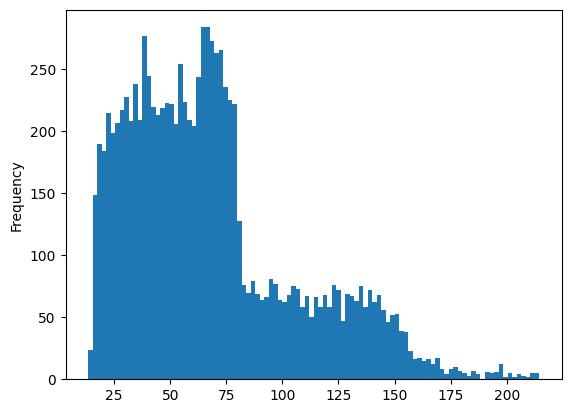

In [694]:
df['SessionTime'].sample(n=10_000).apply(lambda x: x.total_seconds()/60.).plot.hist(bins=100)

<AxesSubplot: ylabel='Frequency'>

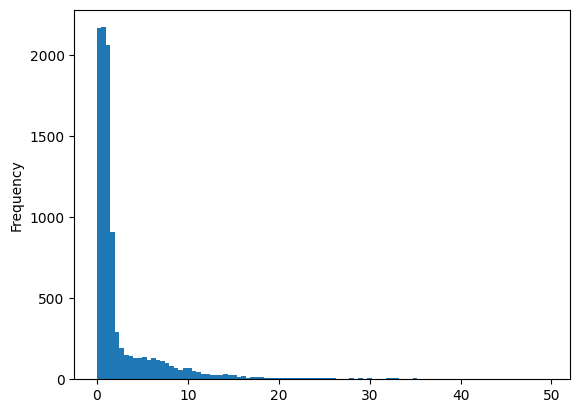

In [695]:
df['Time'].sample(n=10_000).apply(lambda x: x.total_seconds()/60.).plot.hist(bins=100)